# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, 'outputs','preprocessing','spd','logs', 'microglia')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','microglia')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [8]:
df = log_files_qc(LOGS_PATH)


Total of 3 files were read.
Before dup handeling  (50946, 20)
After duplication removal #1: (50946, 21)
After duplication removal #2: (50946, 21)


## validate folder structure and files existence

In [14]:
# choose batches
batches = [f'batch{i}' for i in range (2,5)]
batches

['batch2', 'batch3', 'batch4']

### Raw Files

batch2
Folder structure is valid.
Some files are bad:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/microglia_sort/batch2/SCNA/panelA/Untreated/rep2/G3BP1, R11_w3confCy5_s1533.tif small size (0.008 kB)
Total Sites:  57331


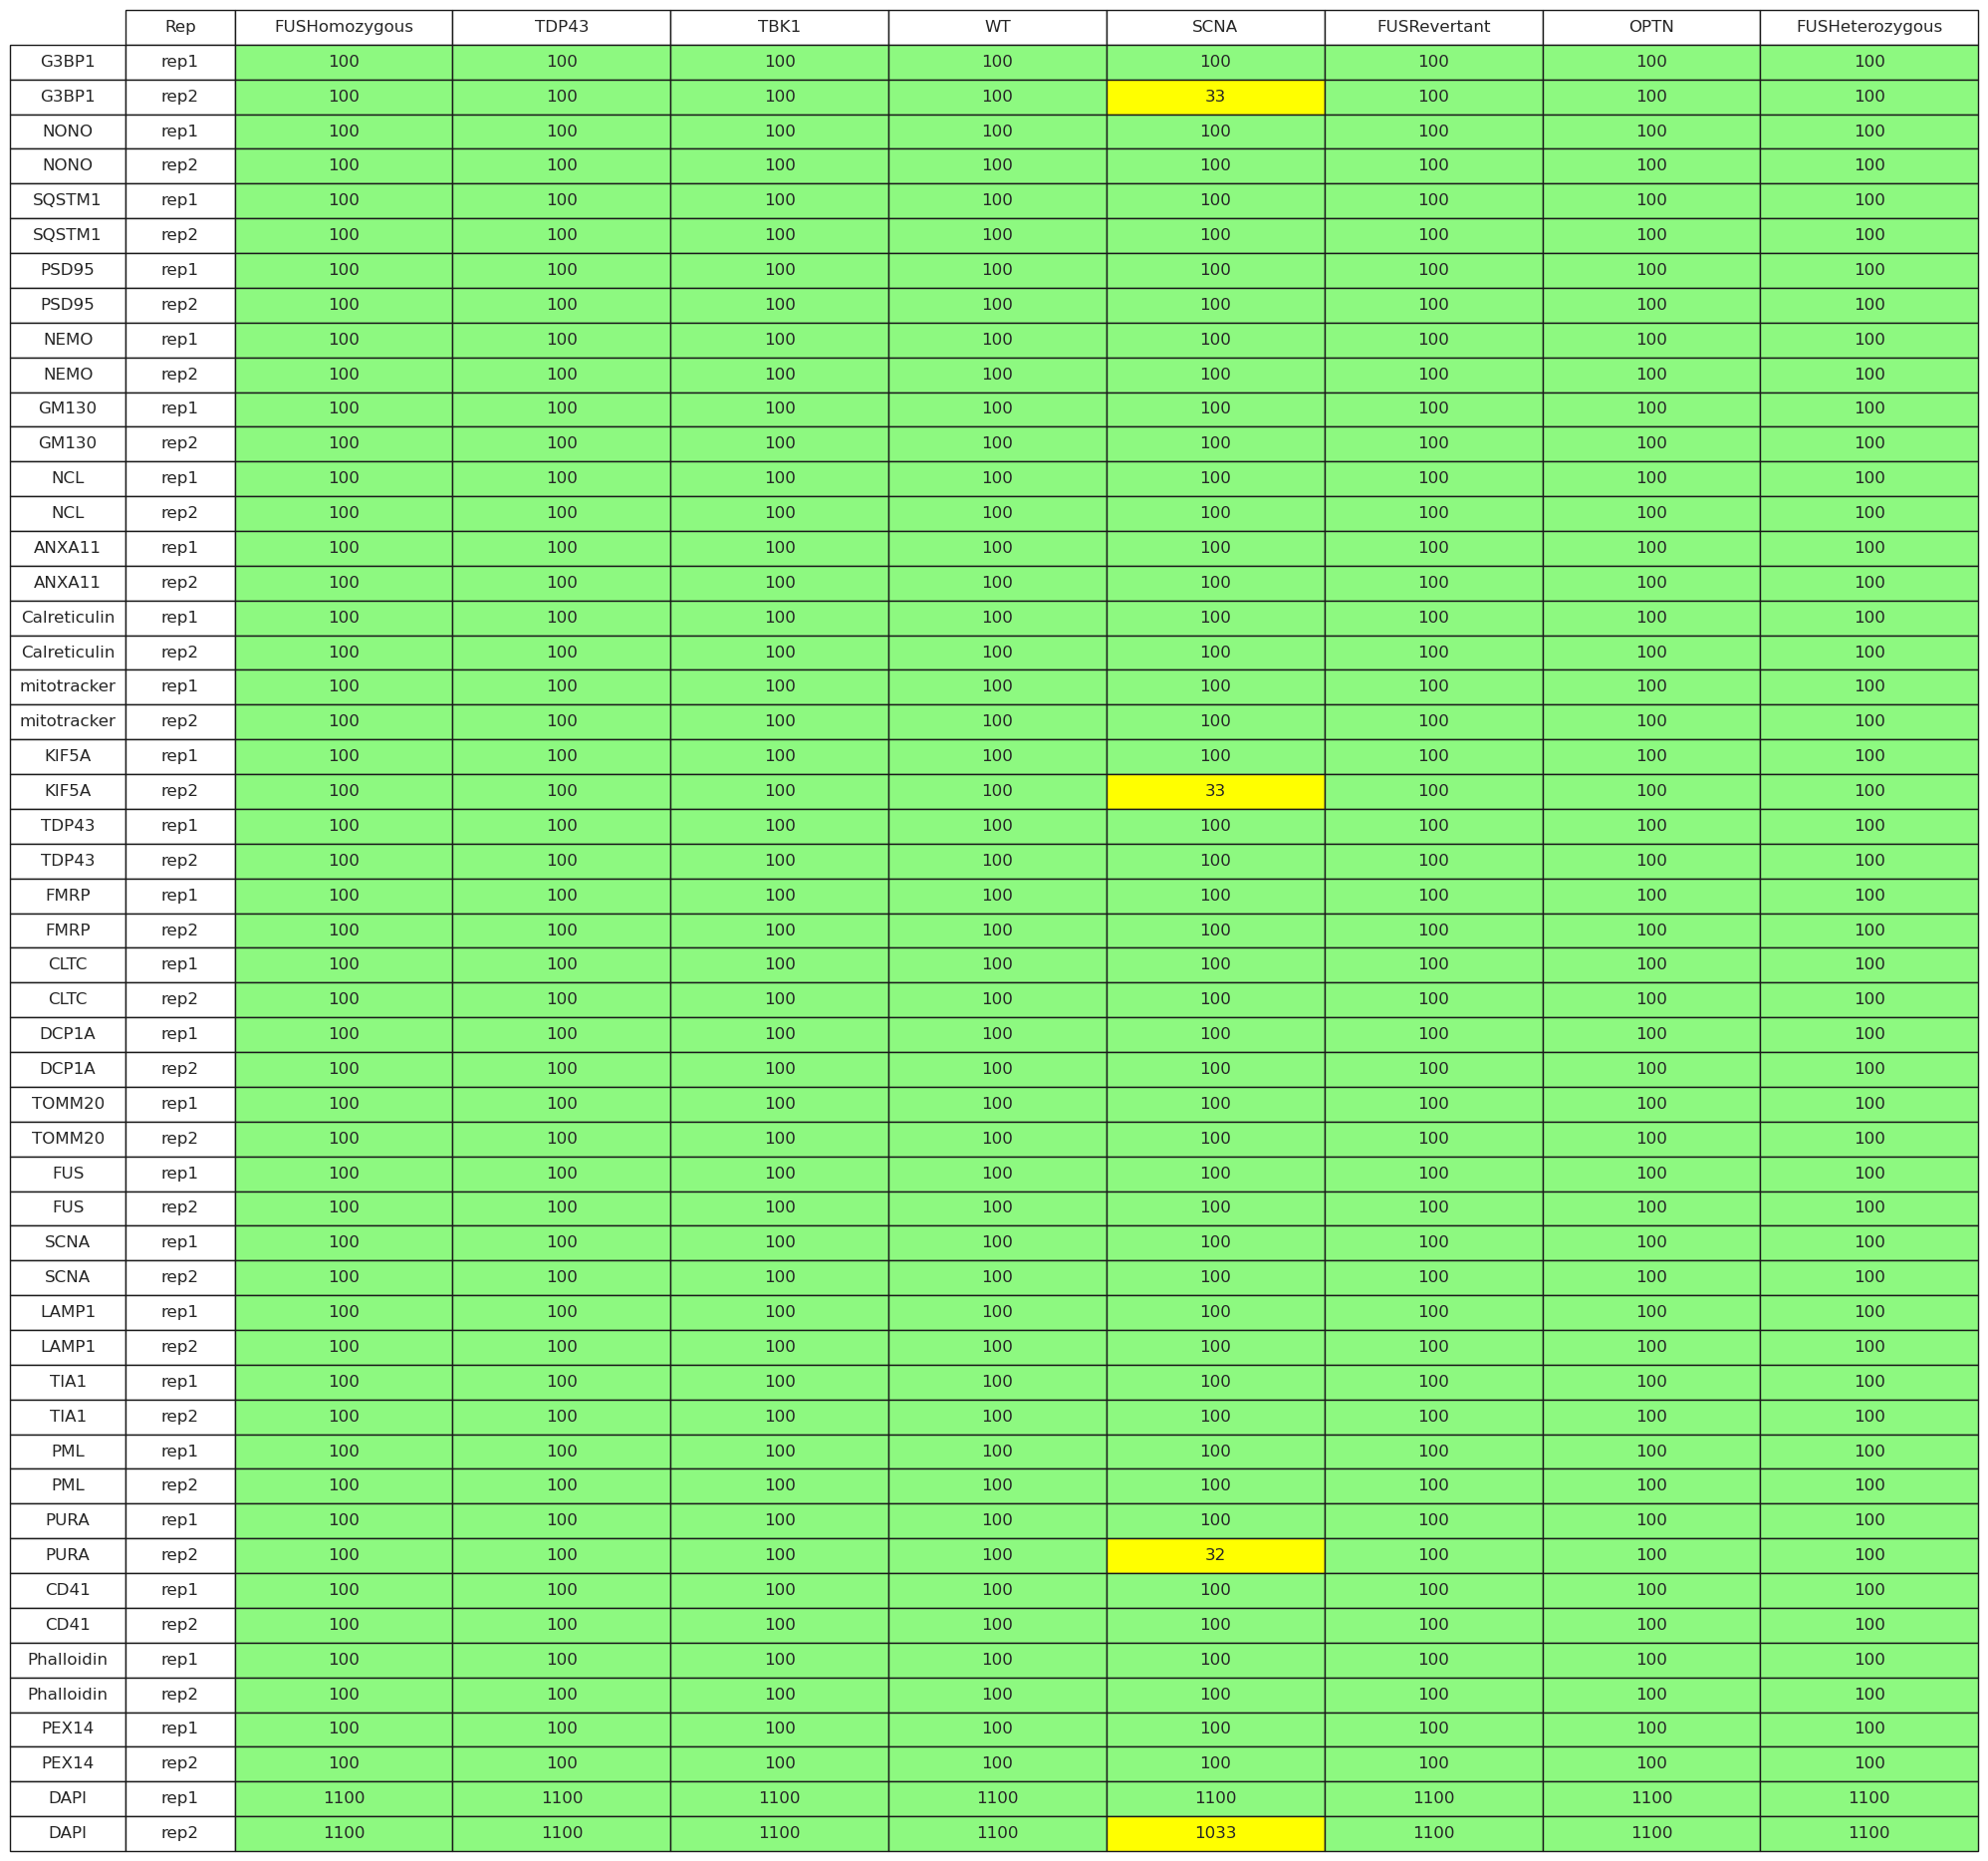

batch3
Folder structure is valid.
Some files are bad:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/microglia_sort/batch3/SCNA/panelC/Untreated/rep1/FMRP, R11_w2confmCherry_s1413.tif small size (0.008 kB)
Total Sites:  56850


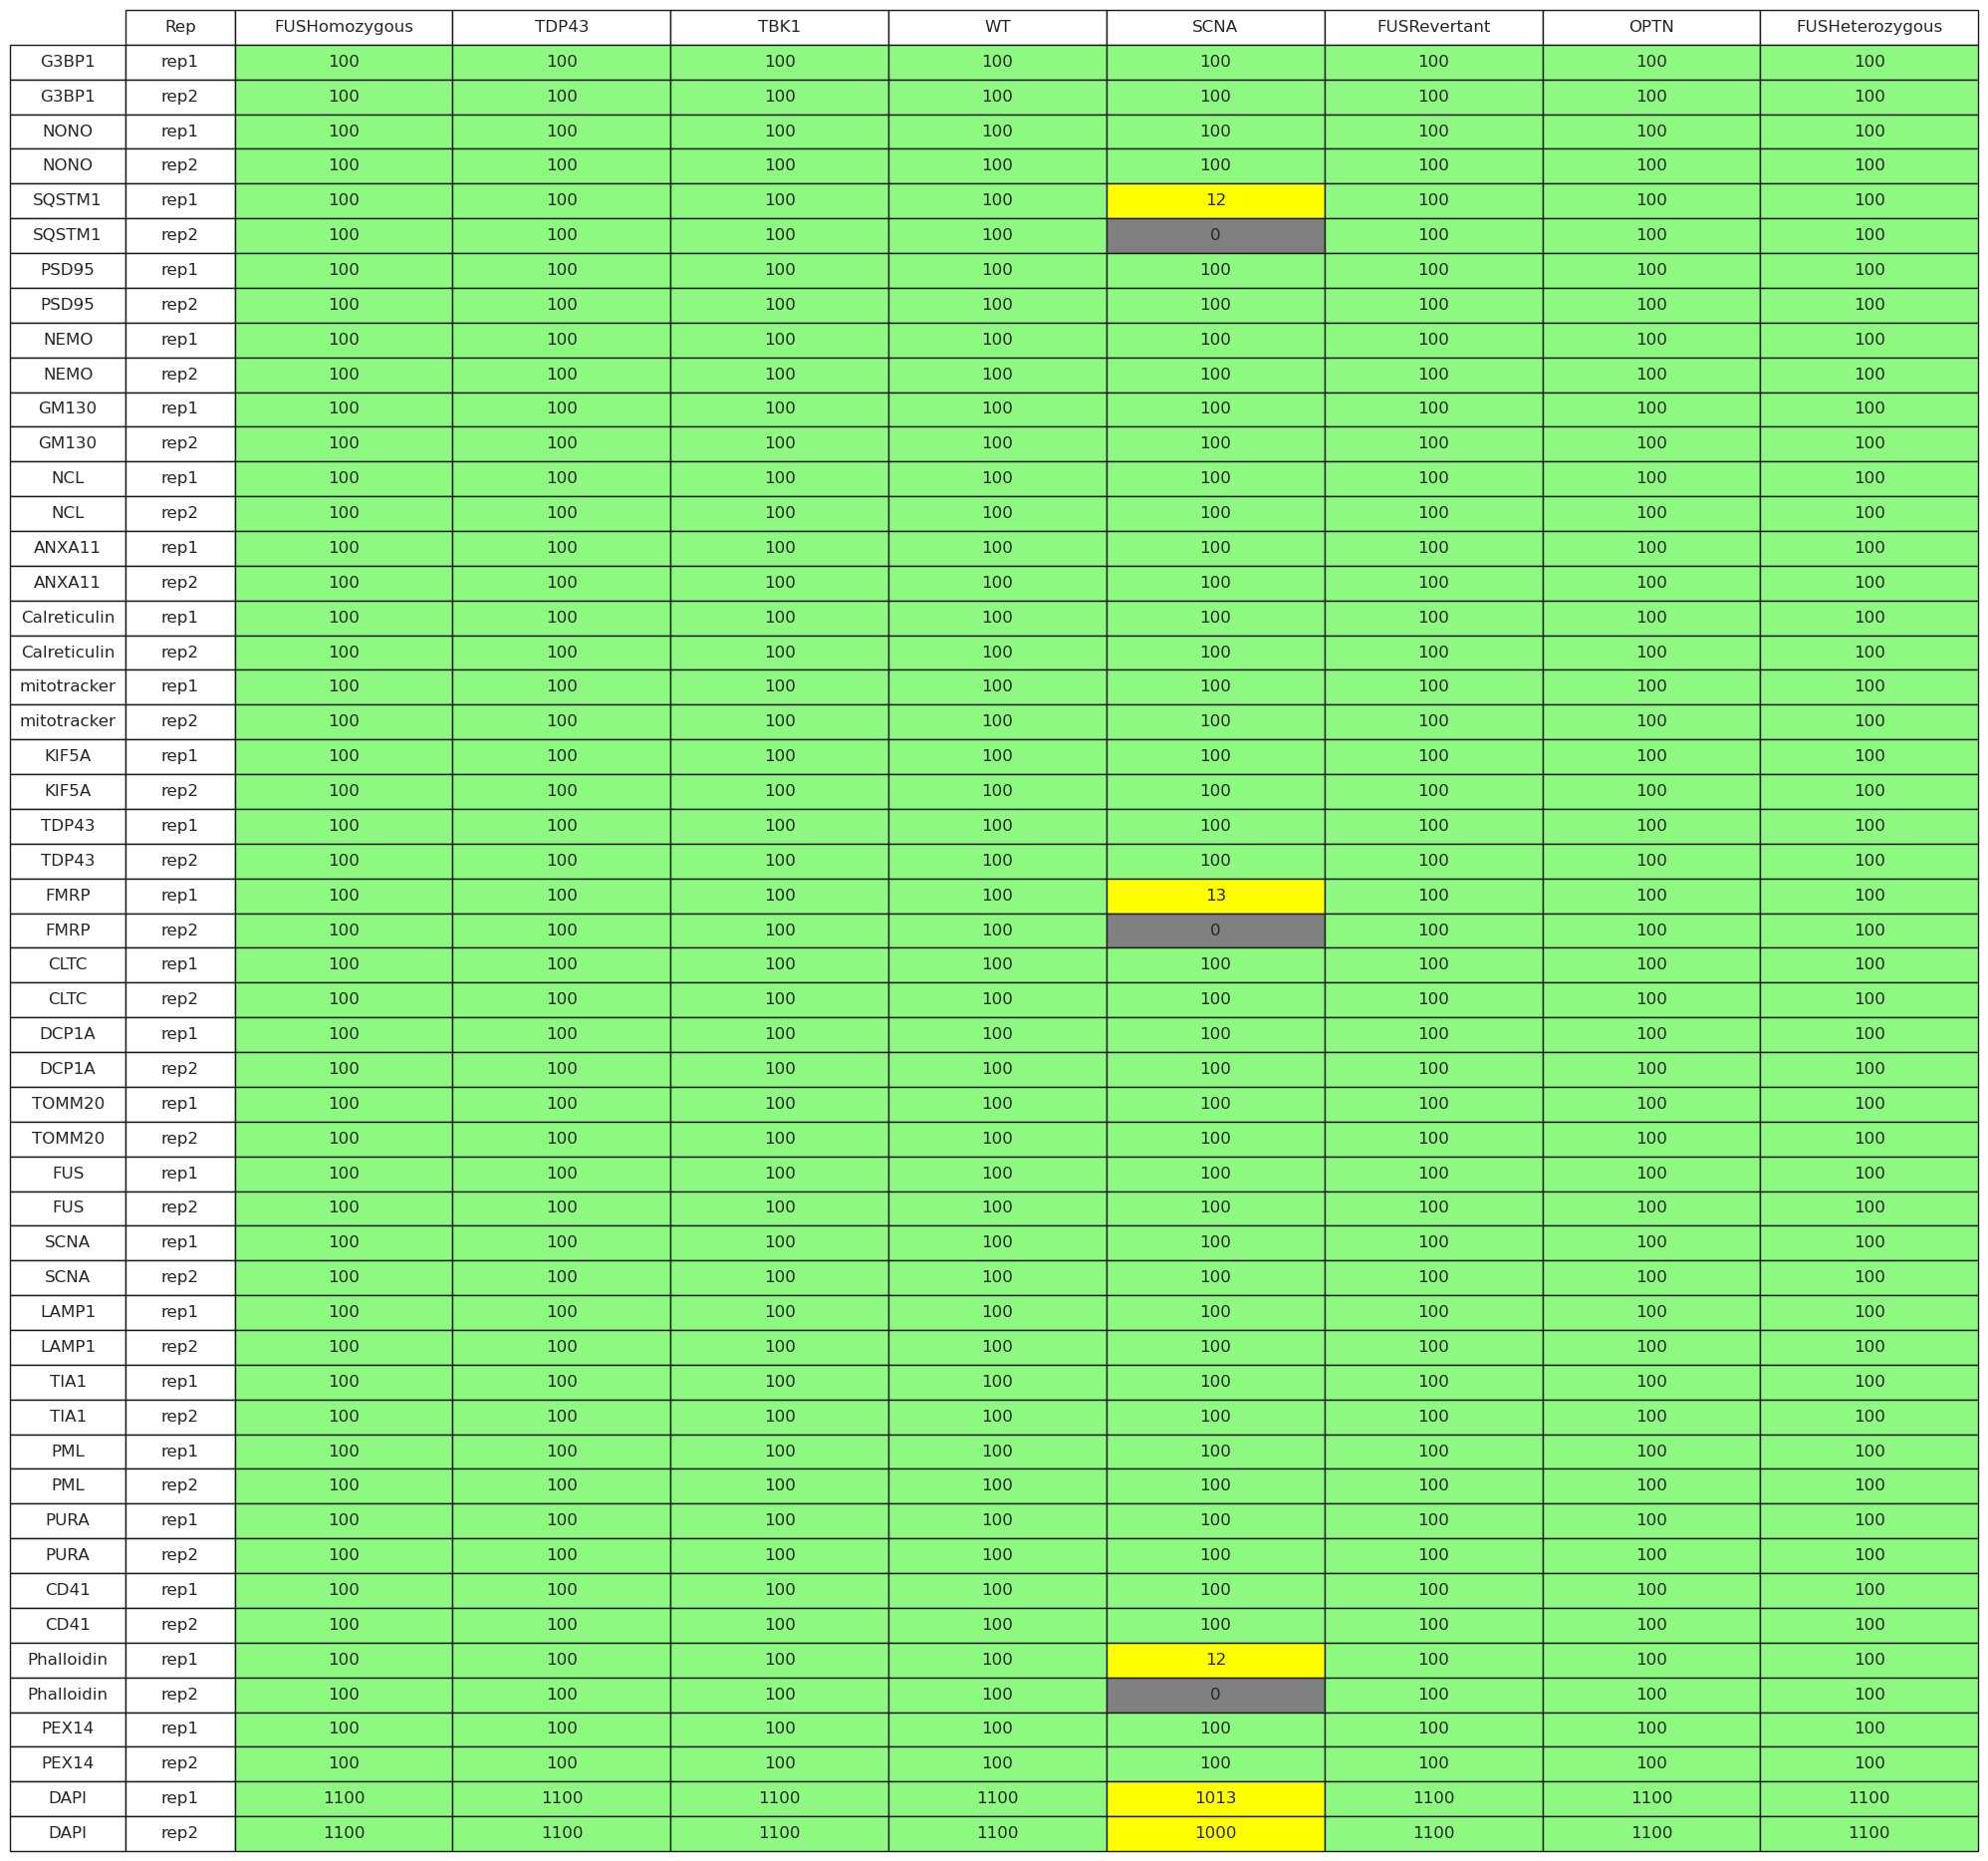

batch4
Folder structure is valid.
All files exists.
Total Sites:  52800


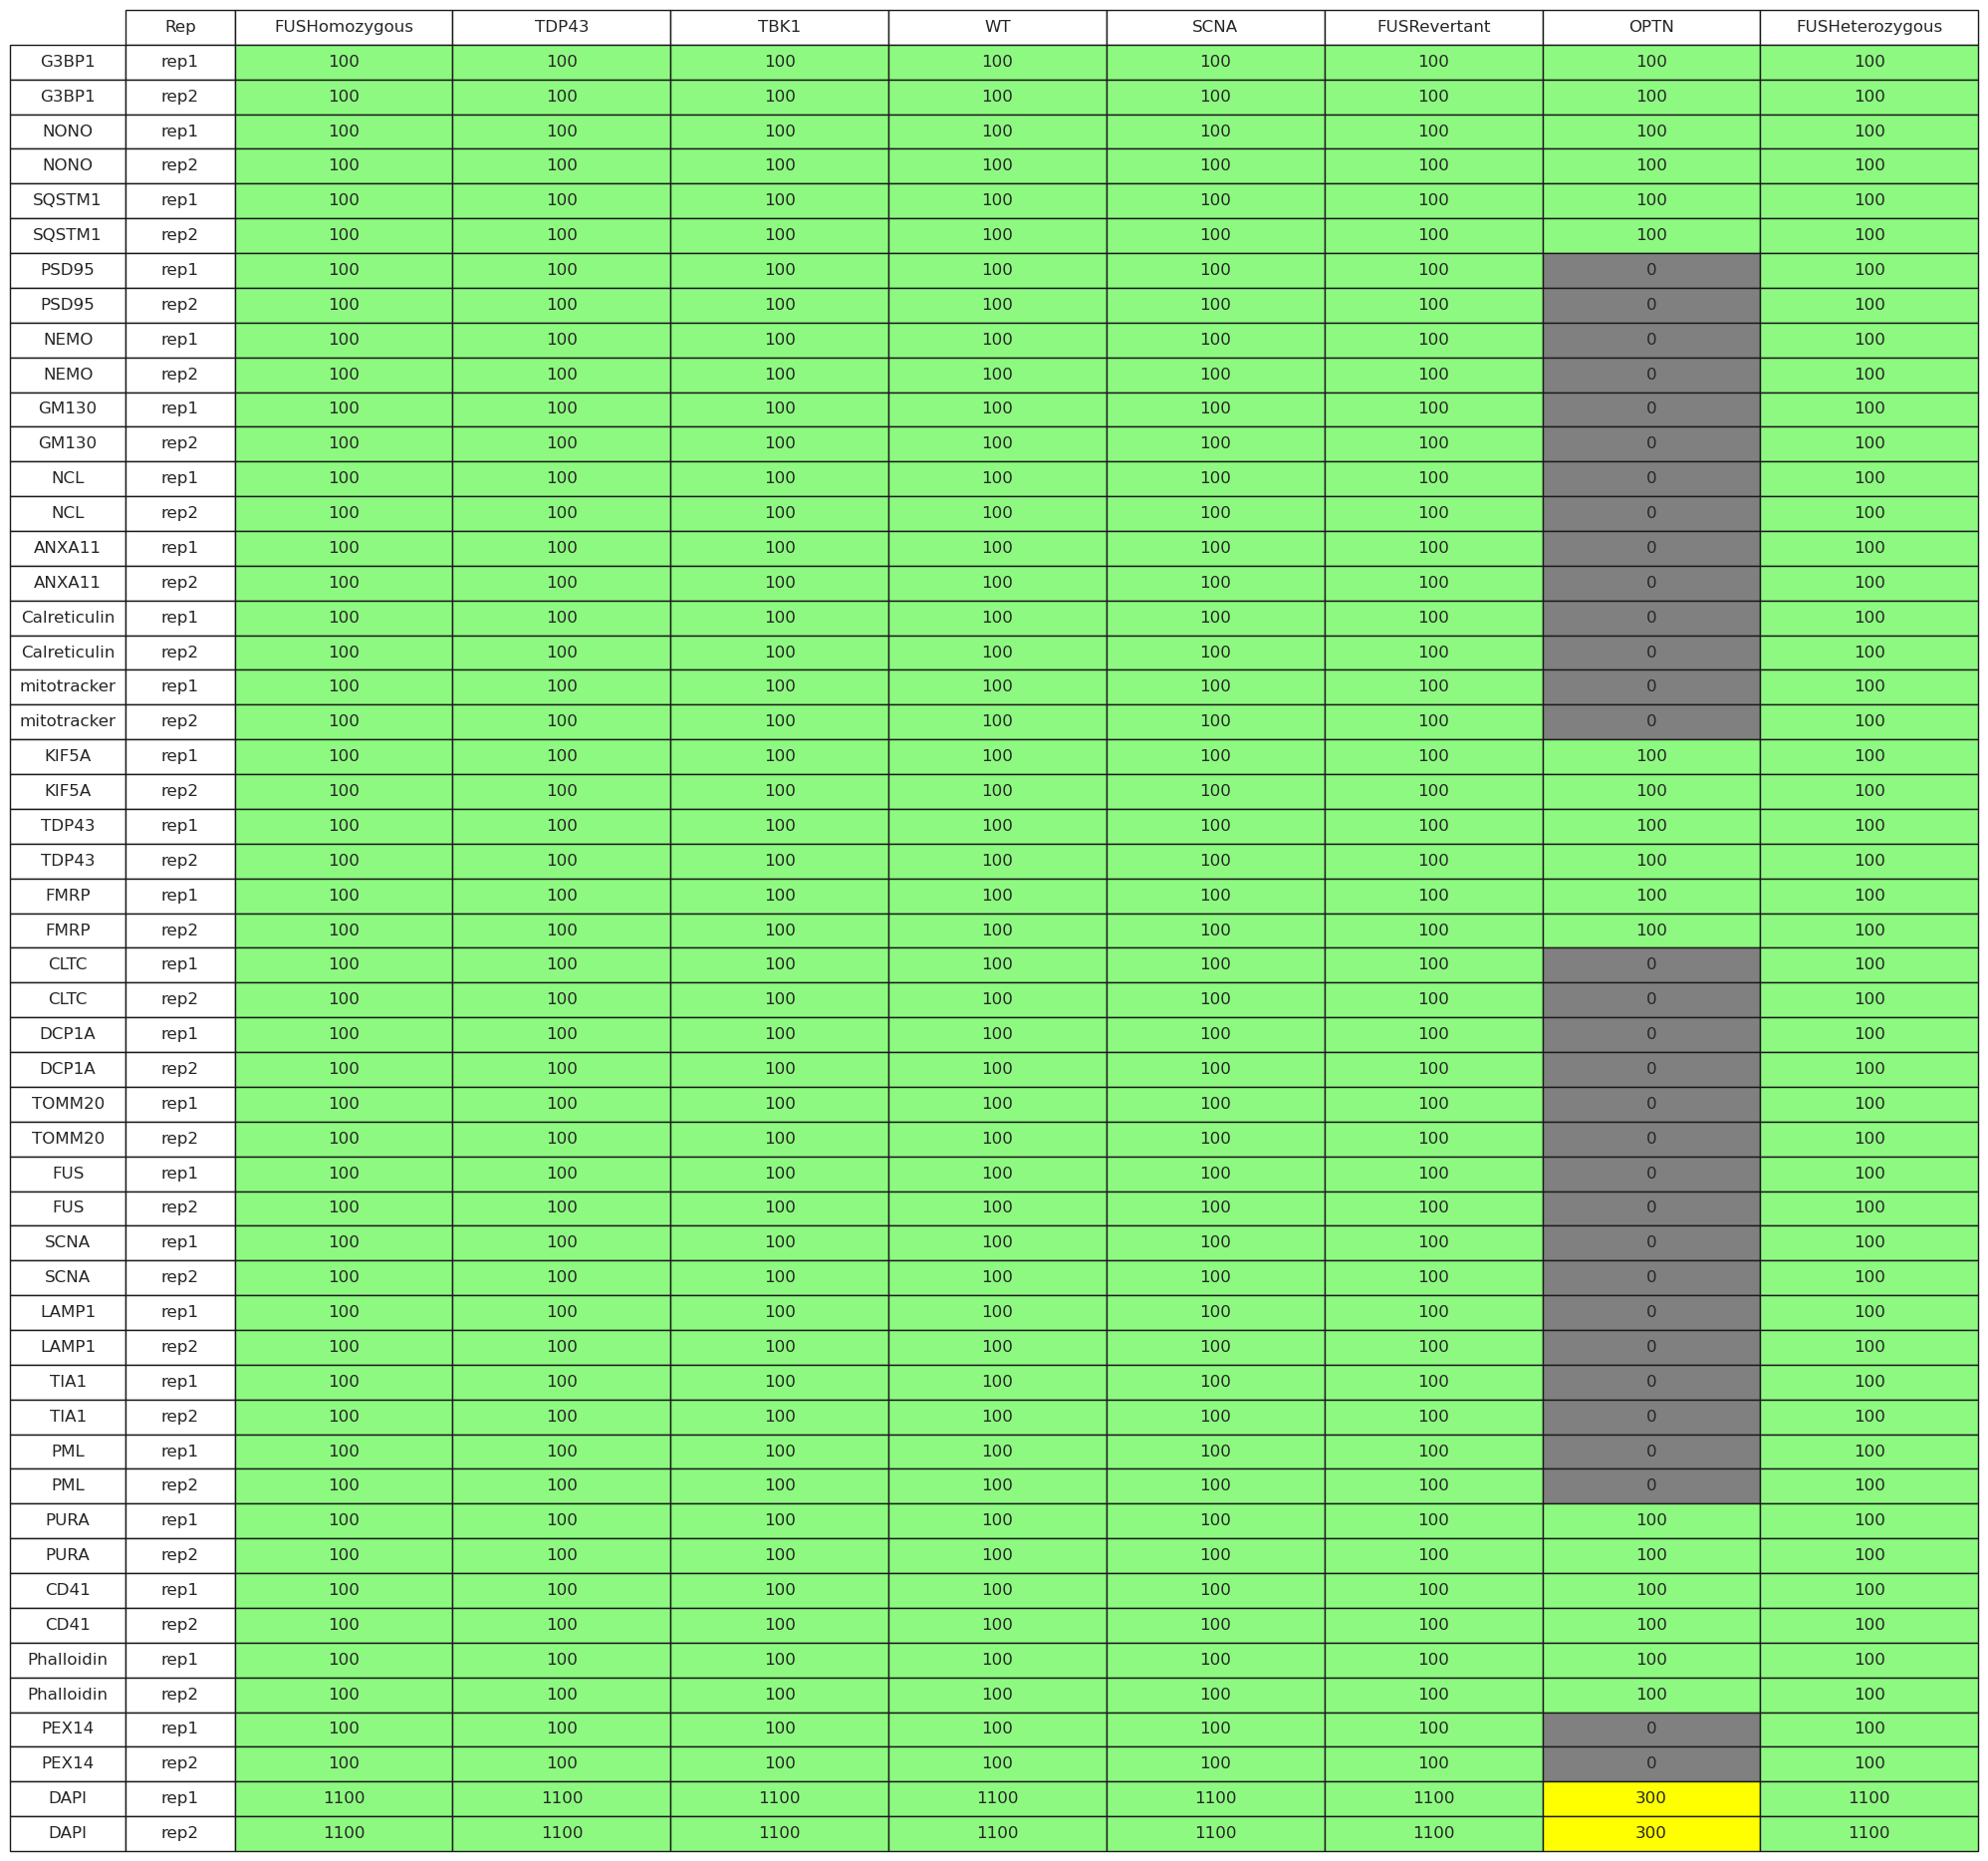

In [7]:
root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 'SpinningDisk','microglia_sort')

raws = run_validate_folder_structure(root_directory_raw, False, panels, markers,
                                     PLOT_PATH,marker_info,
                                    microglia_cell_lines_to_cond, reps, 
                                     microglia_cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Processed

batch2
Folder structure is valid.
All files exists.
Total Sites:  15022


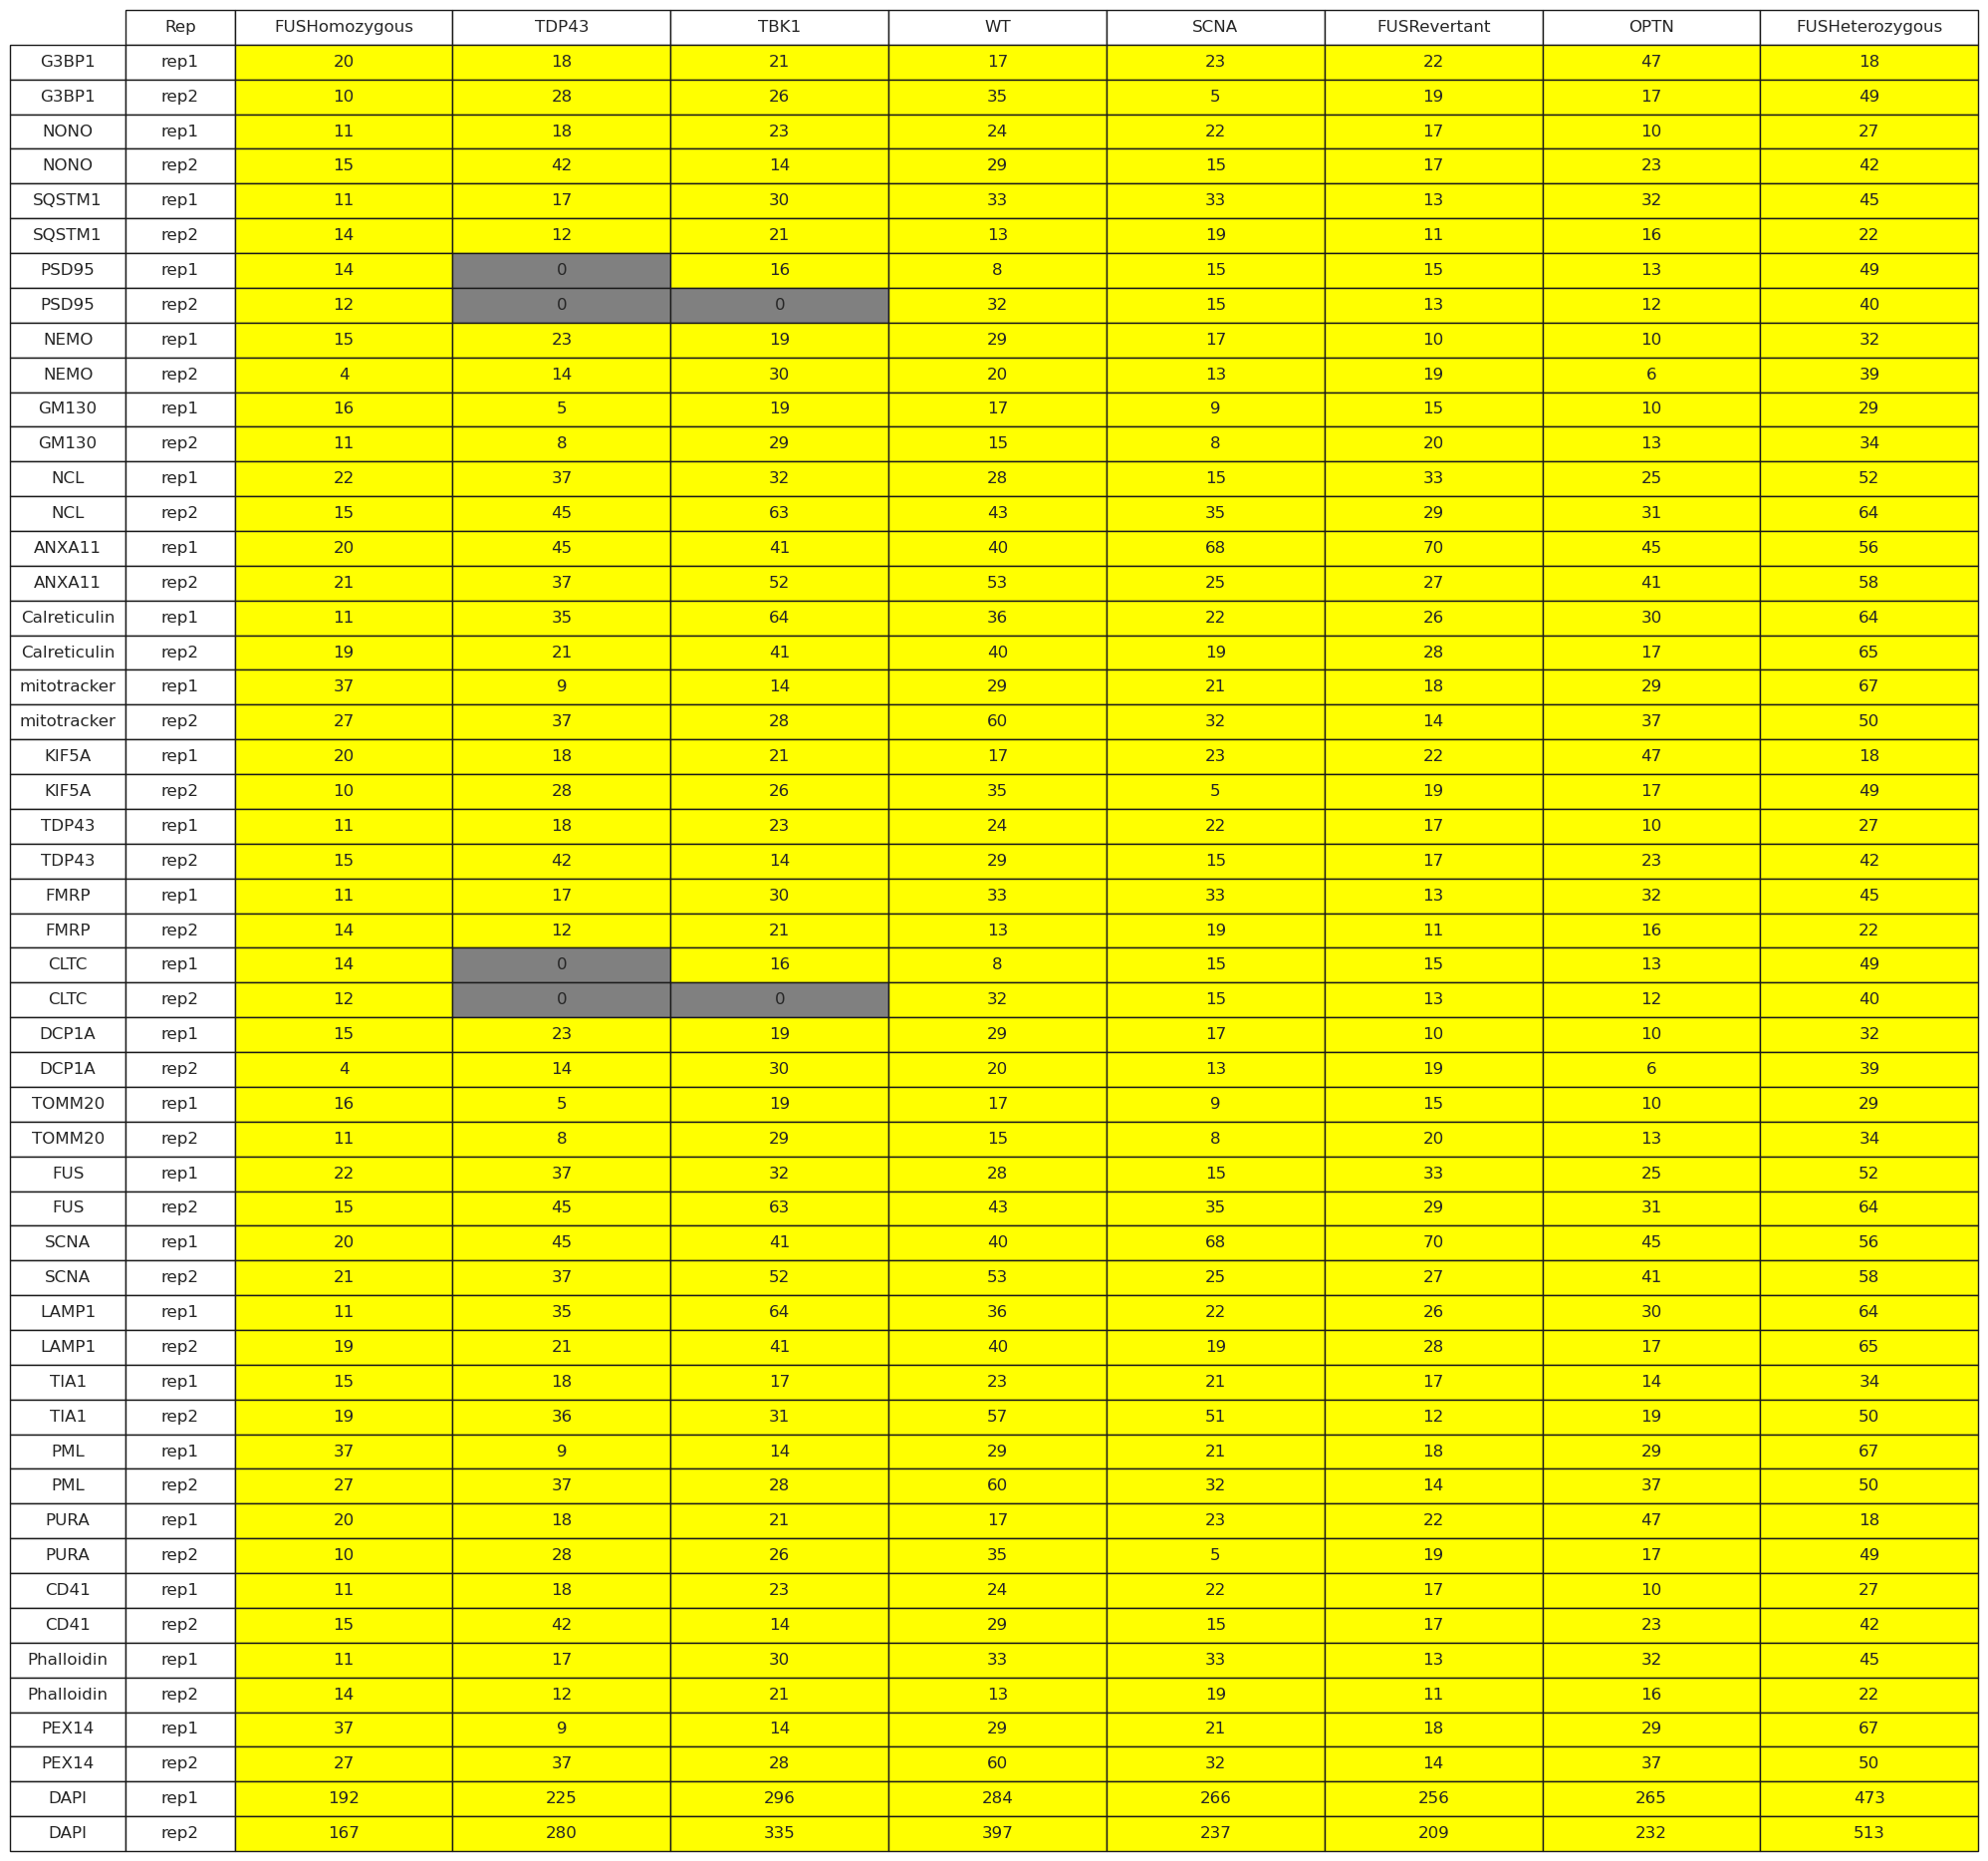

batch3
Folder structure is valid.
All files exists.
Total Sites:  11002


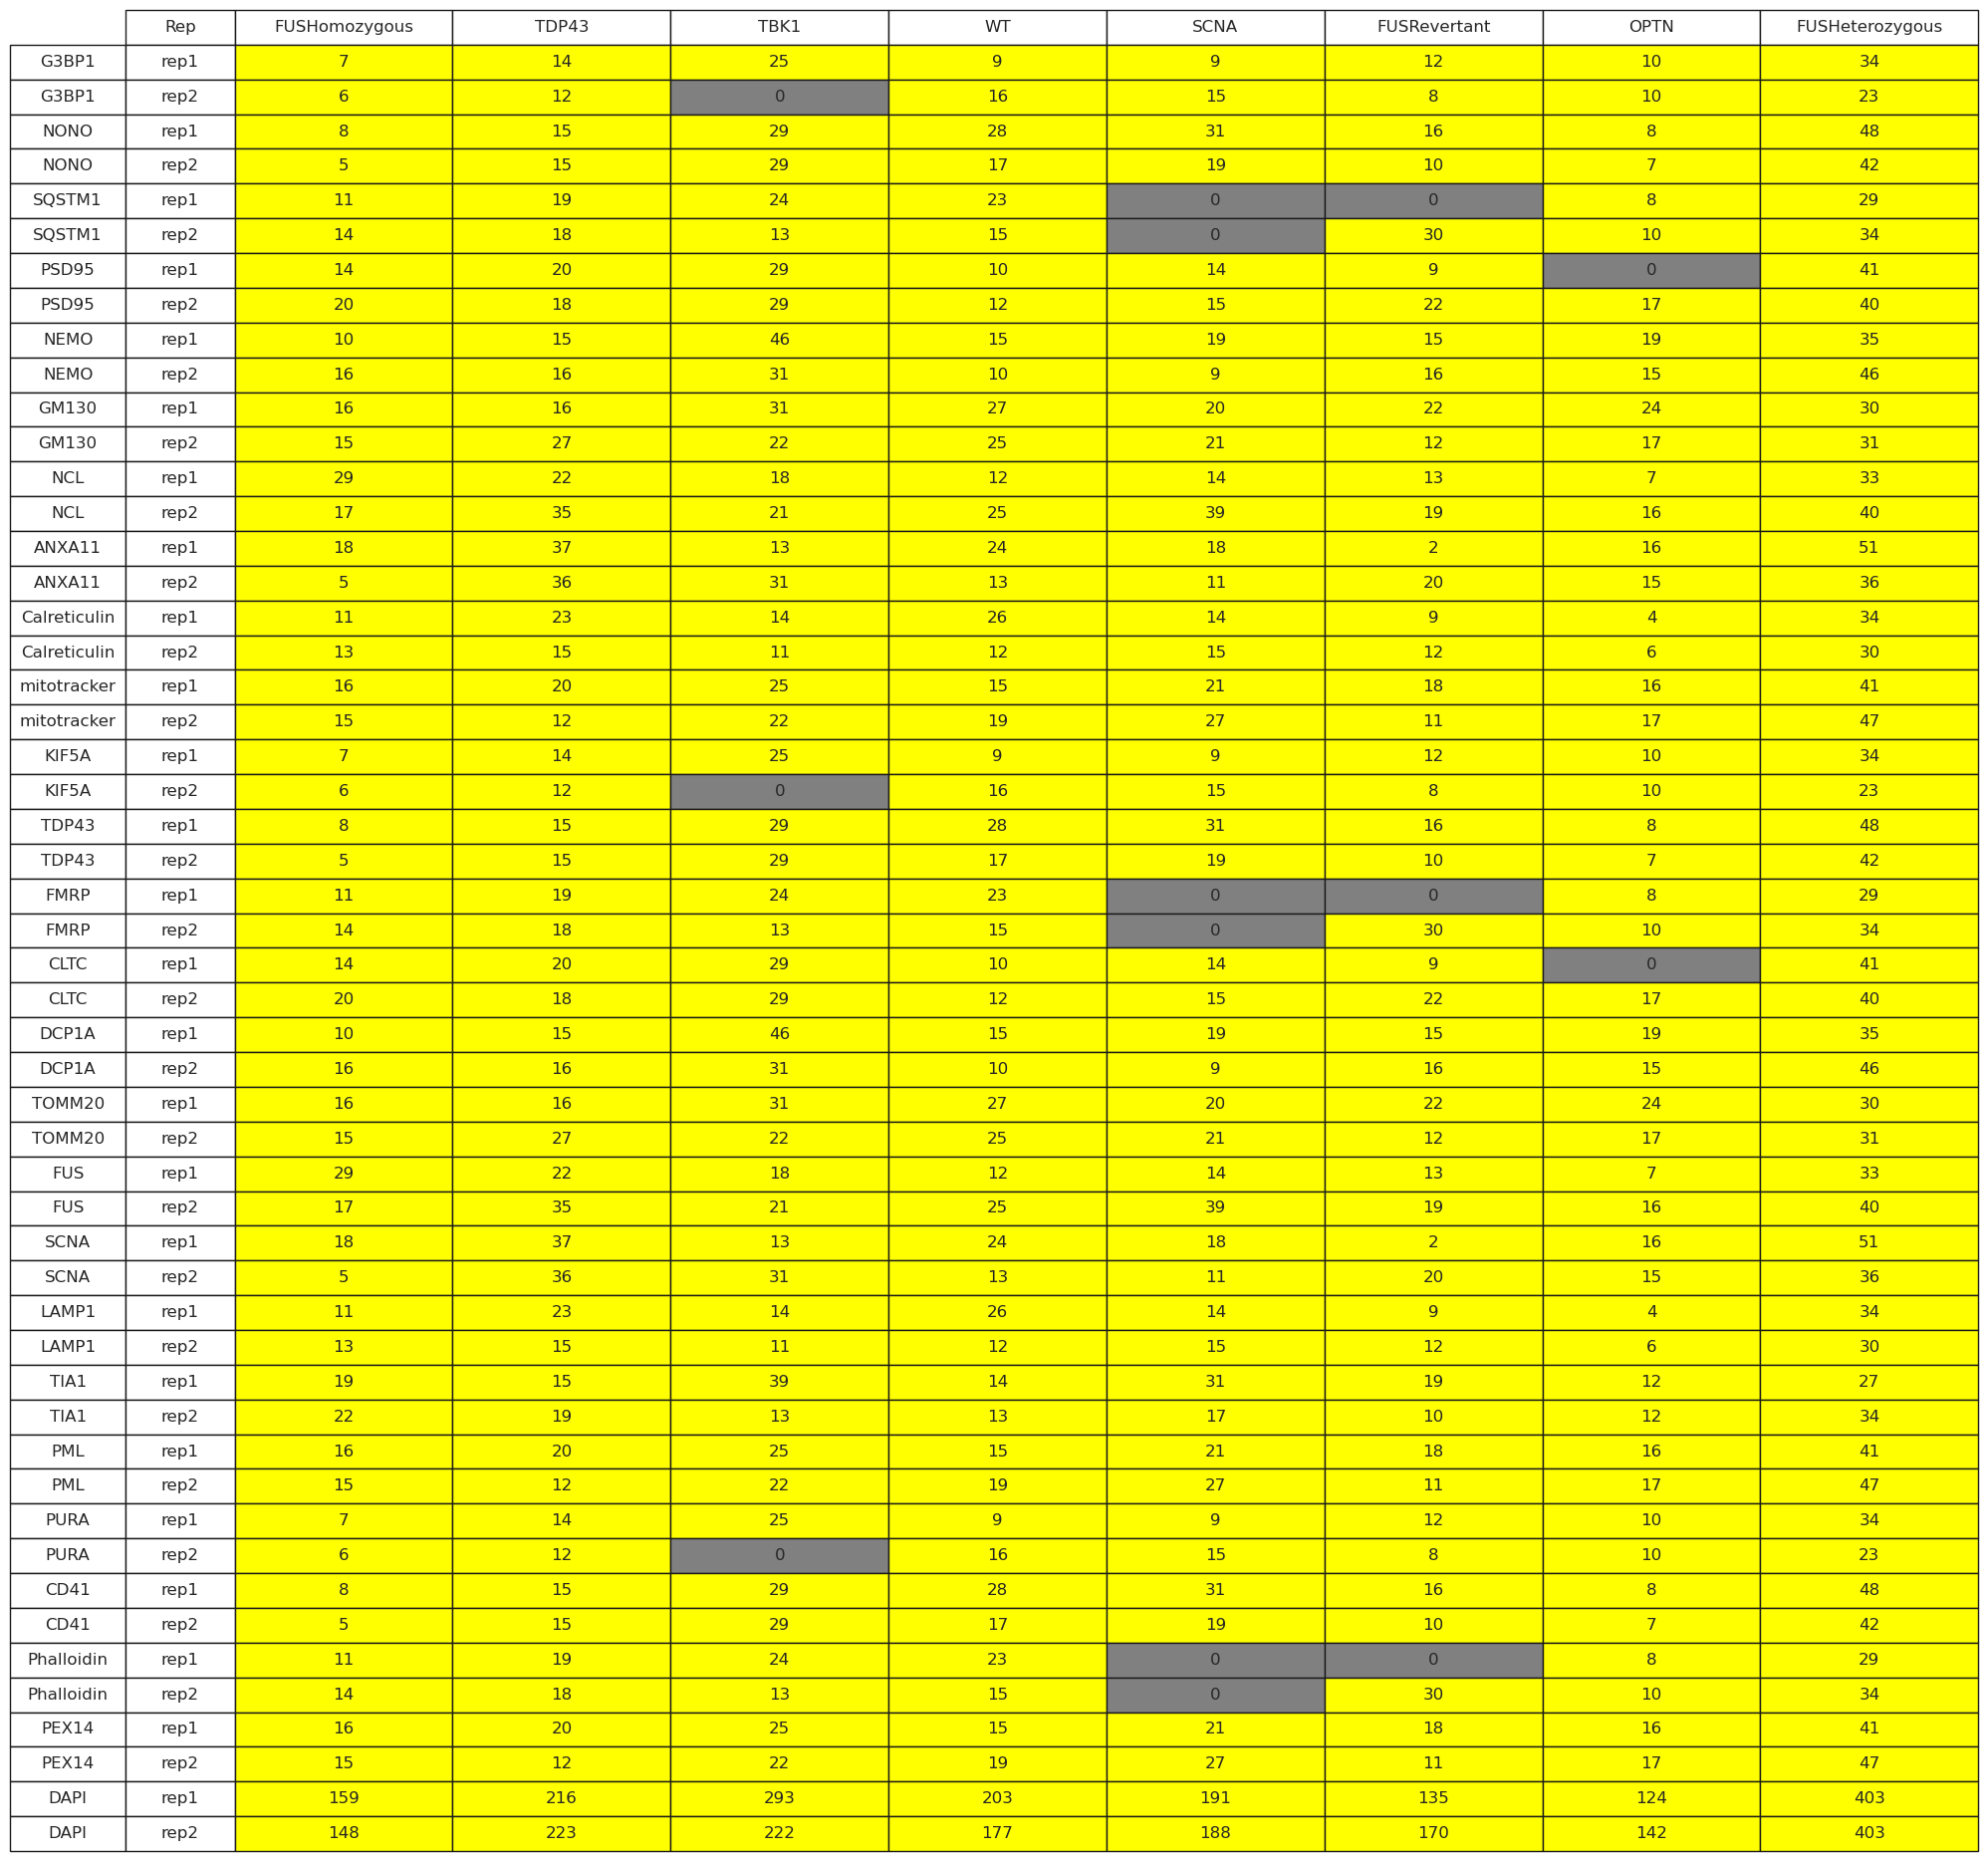

batch4
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/PSD95
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/NEMO
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/GM130
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/NCL
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/ANXA11
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/Calreticulin
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/microglia/batch4/OPTN/Untreated/mitotracker
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/sp

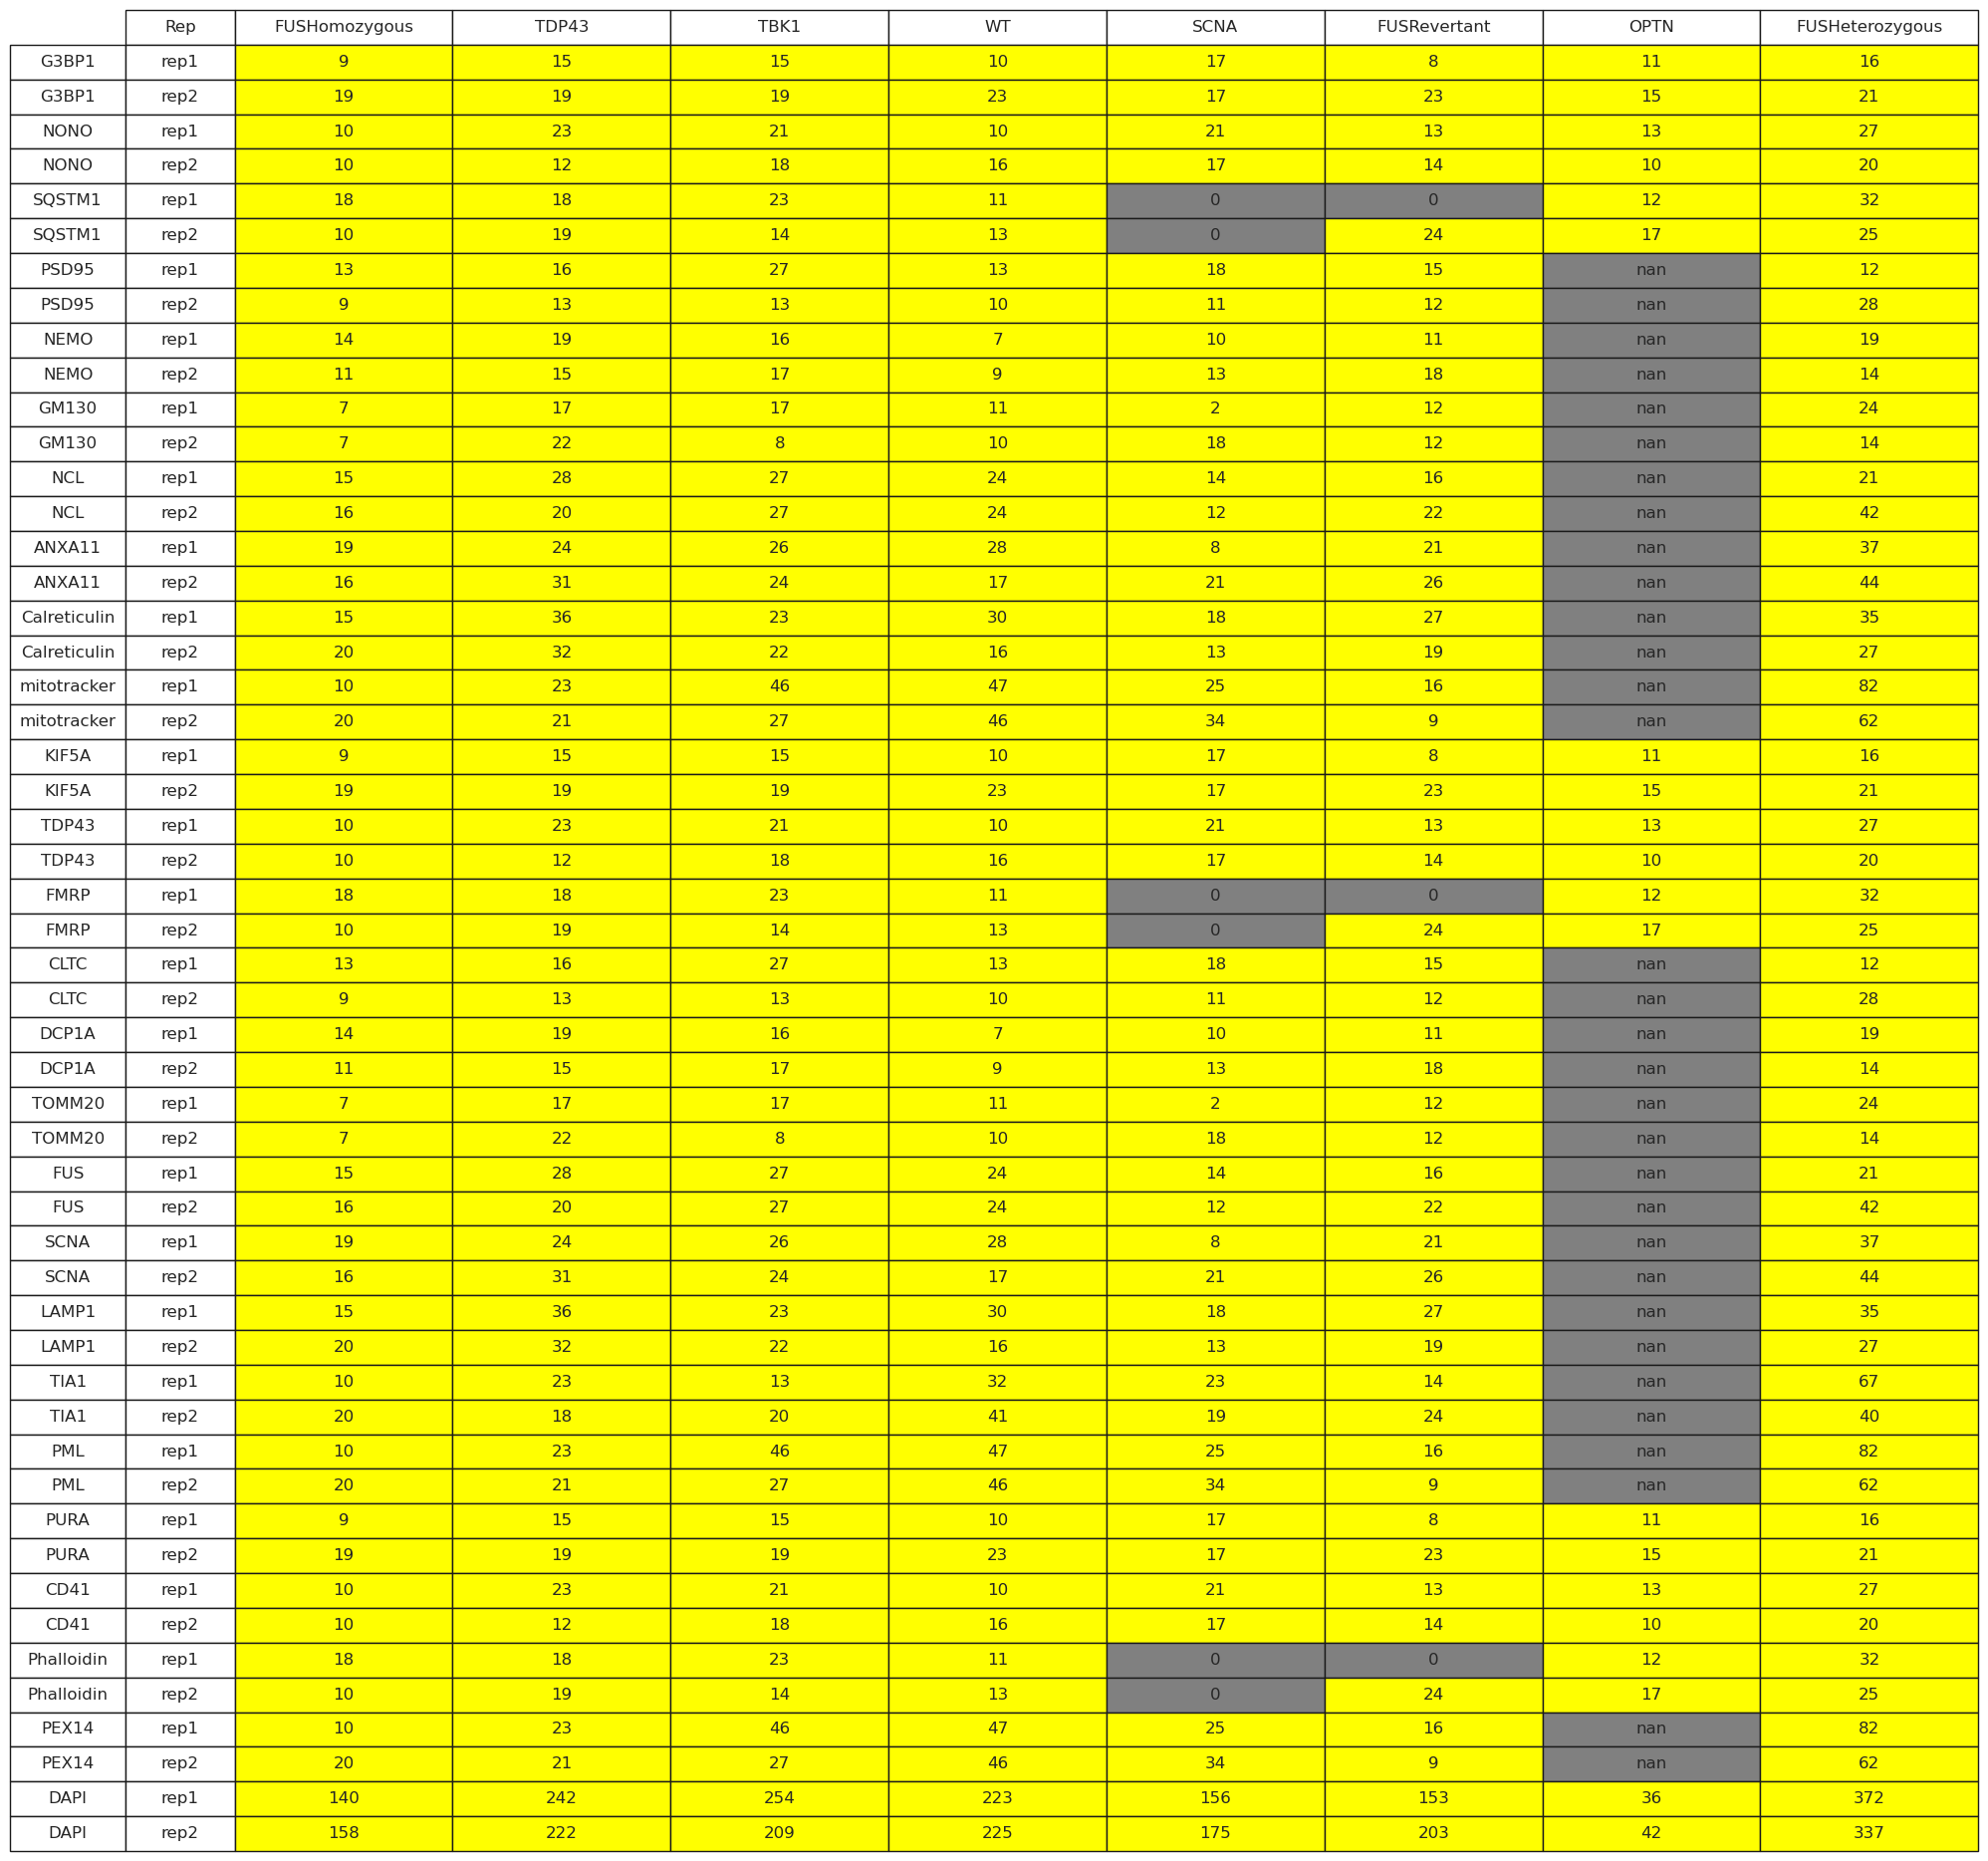

In [8]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk','microglia')
procs = run_validate_folder_structure(root_directory_proc, True, panels, 
                                      markers,PLOT_PATH,marker_info,
                                    microglia_cell_lines_to_cond, reps, microglia_cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Difference between Raw and Processed

batch2


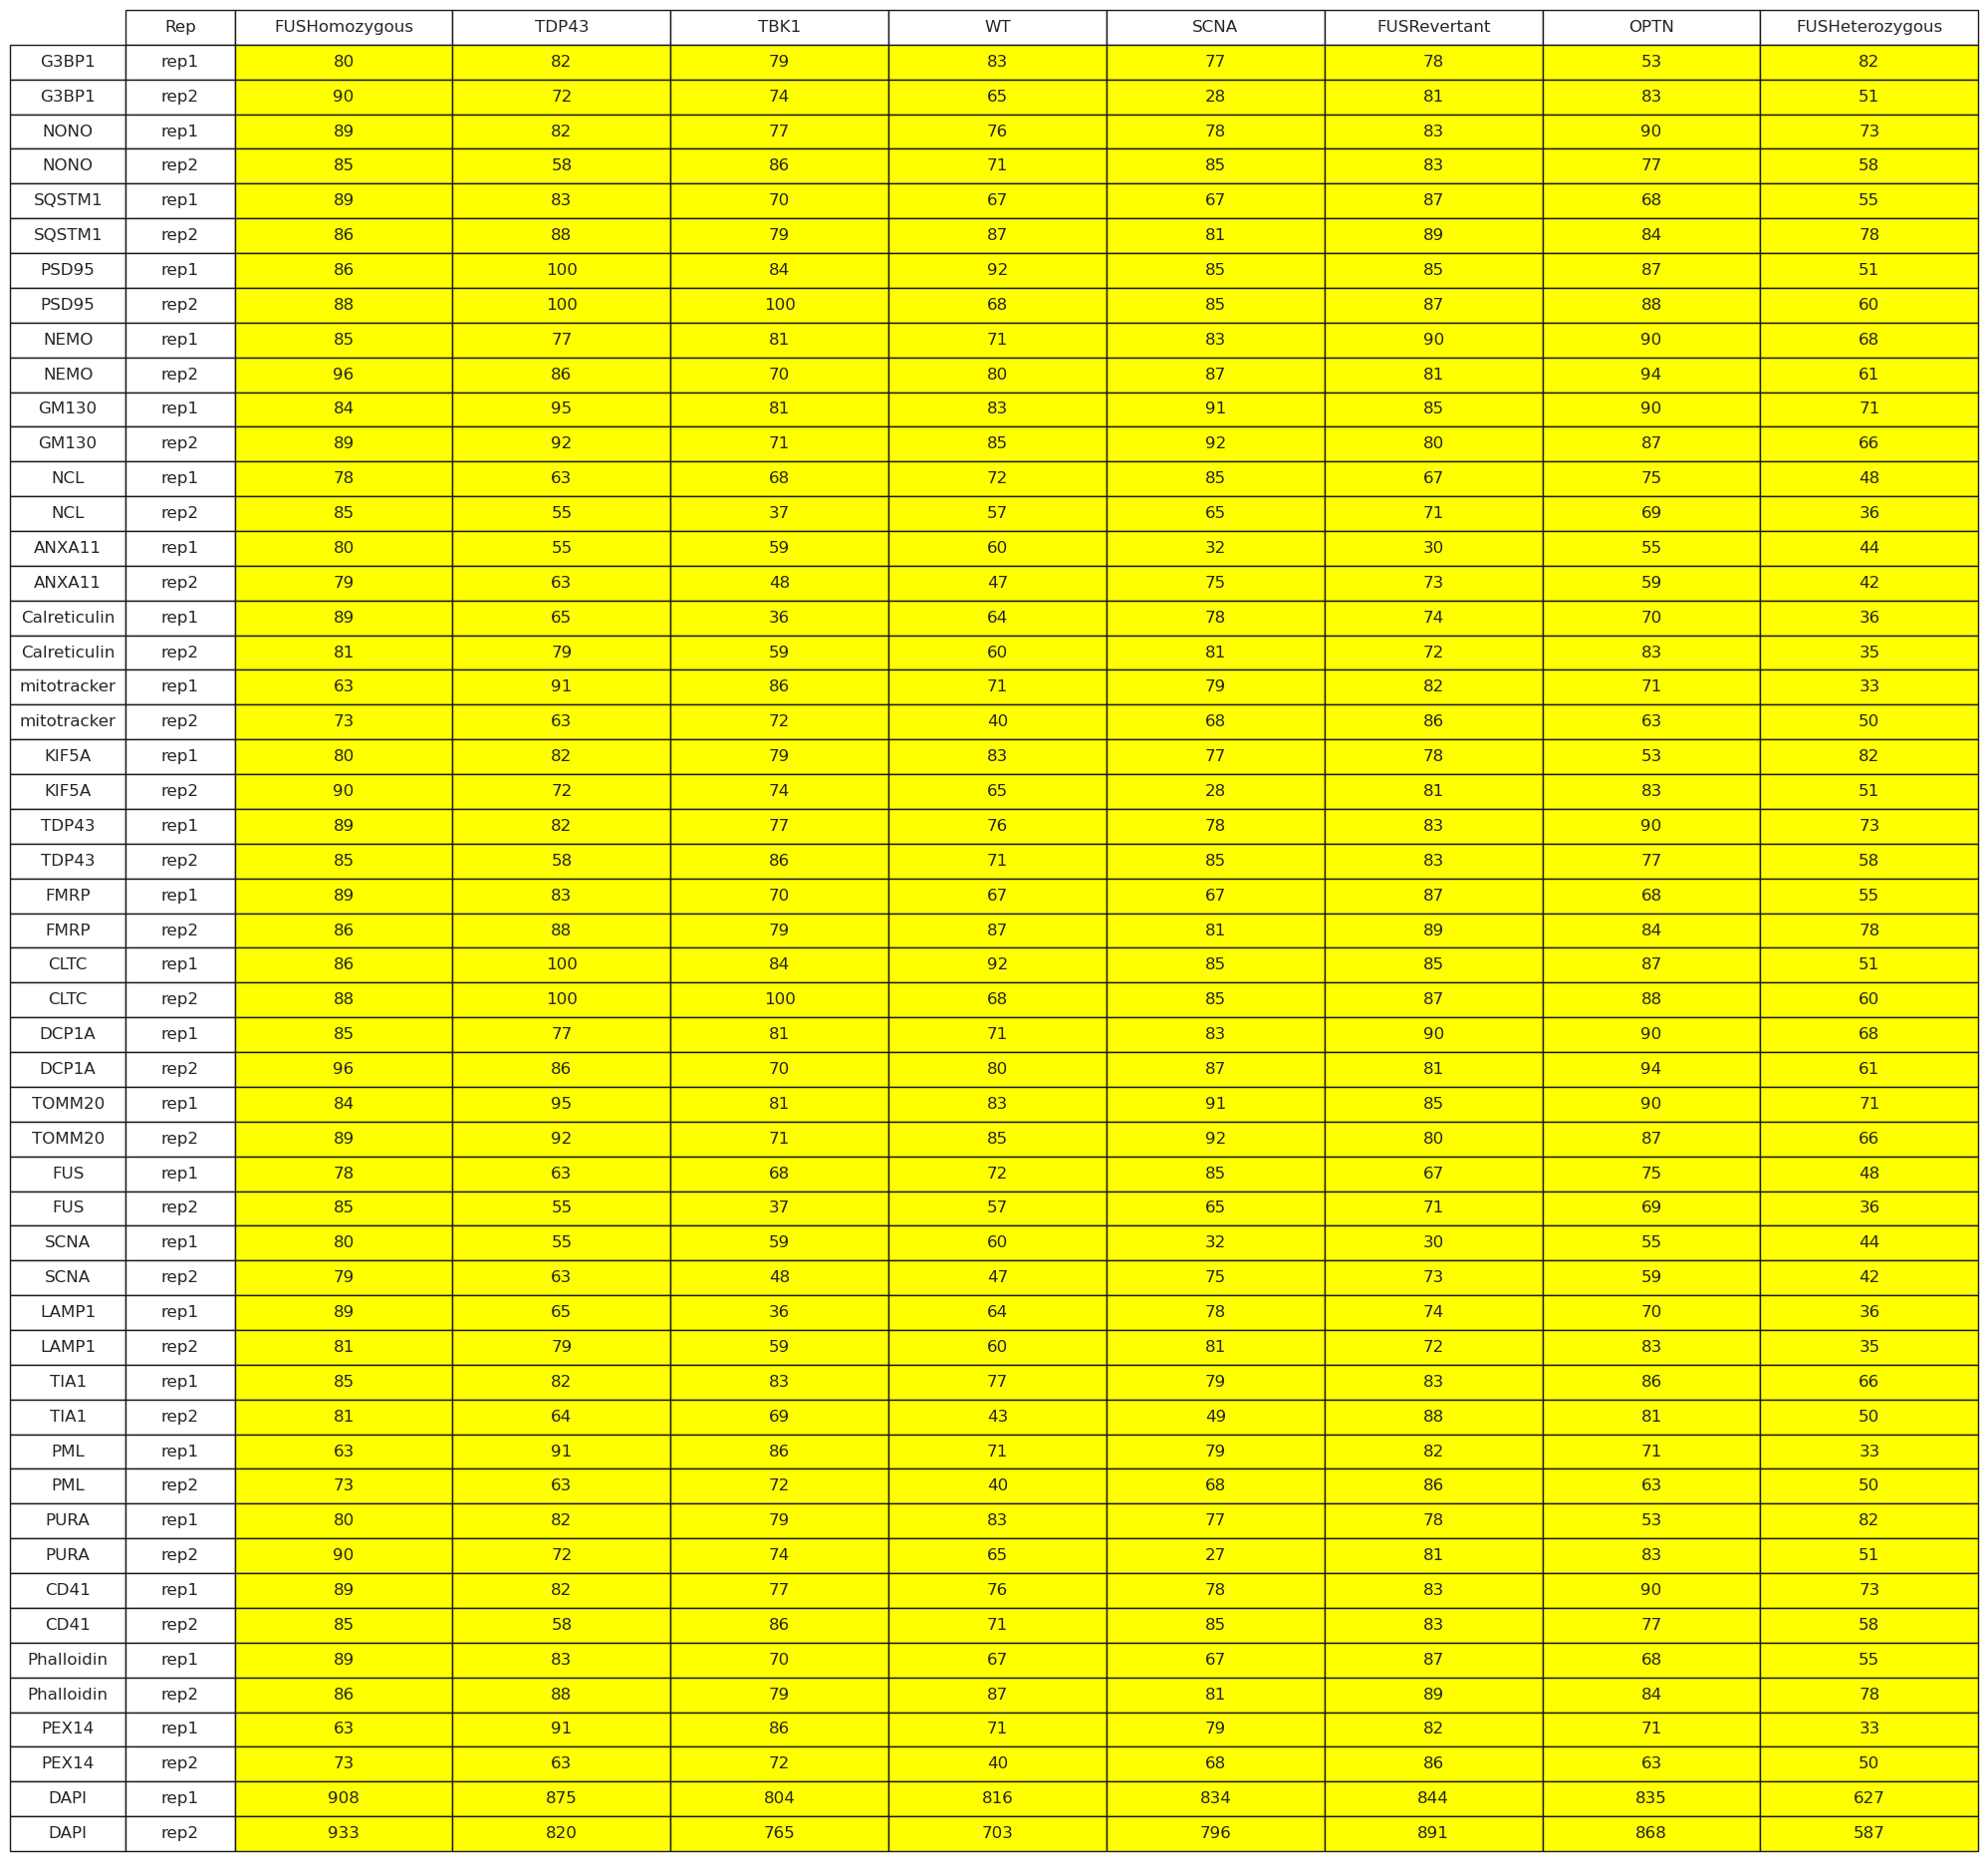

batch3


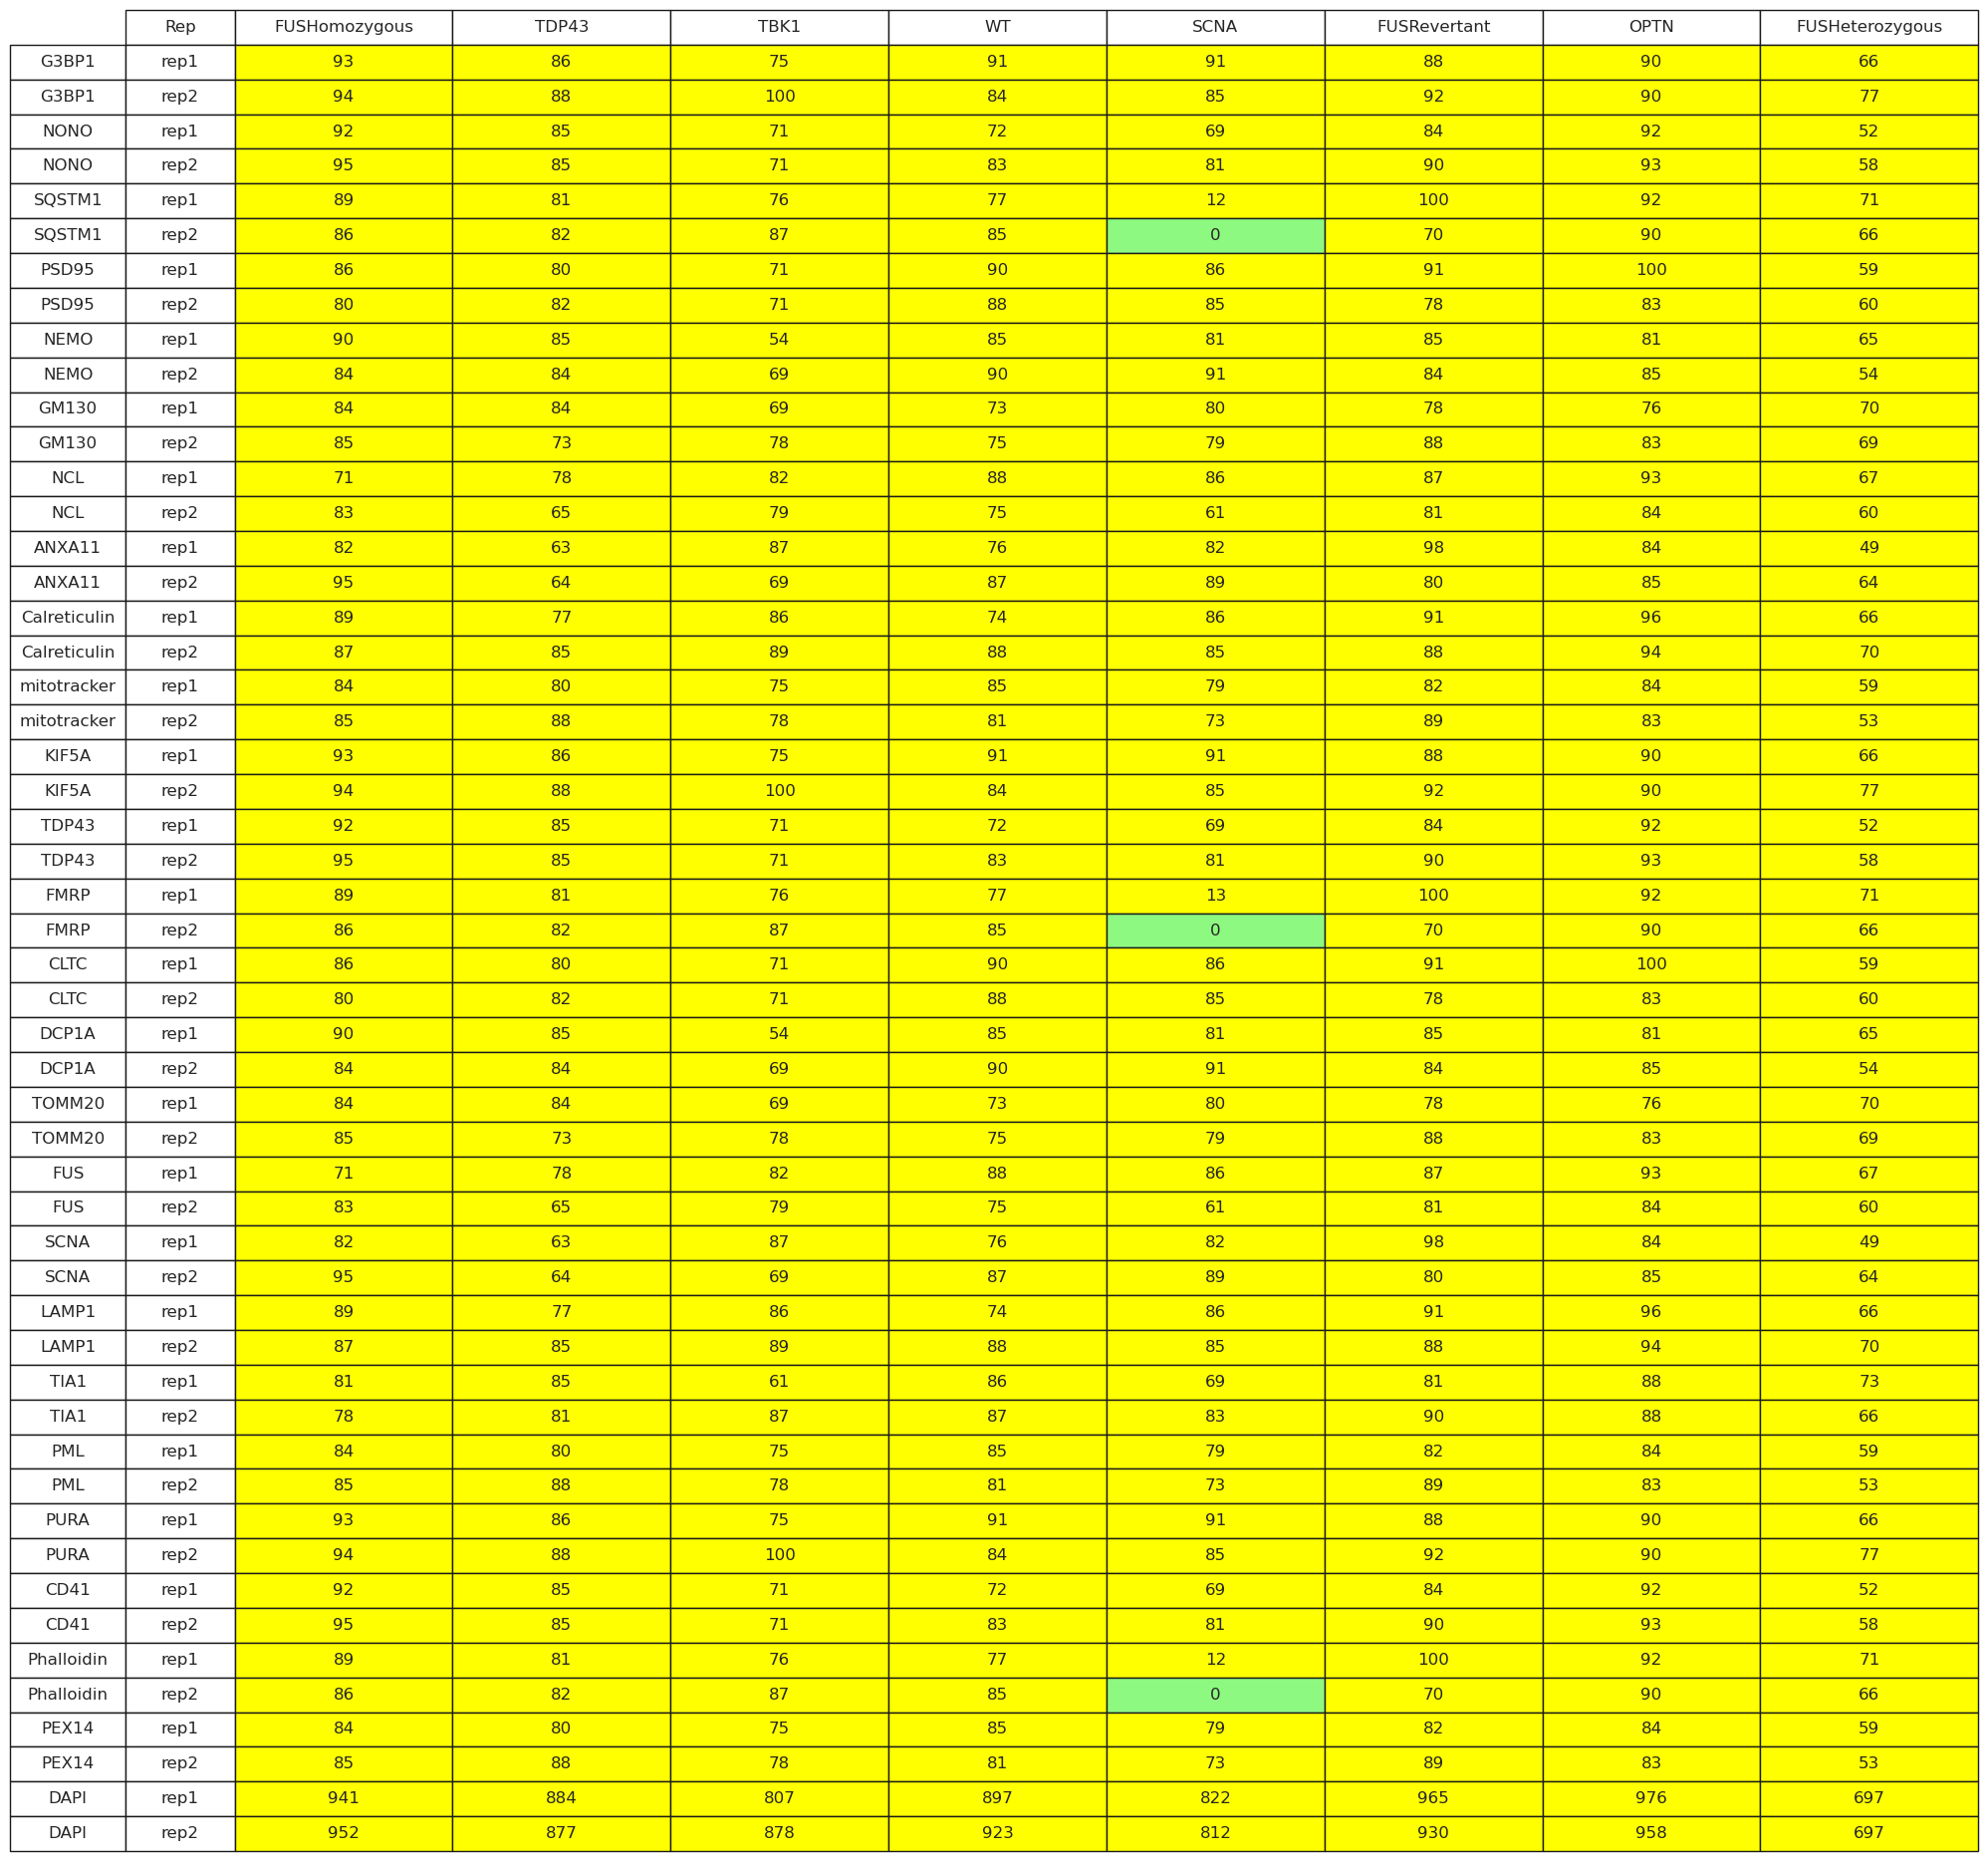

batch4


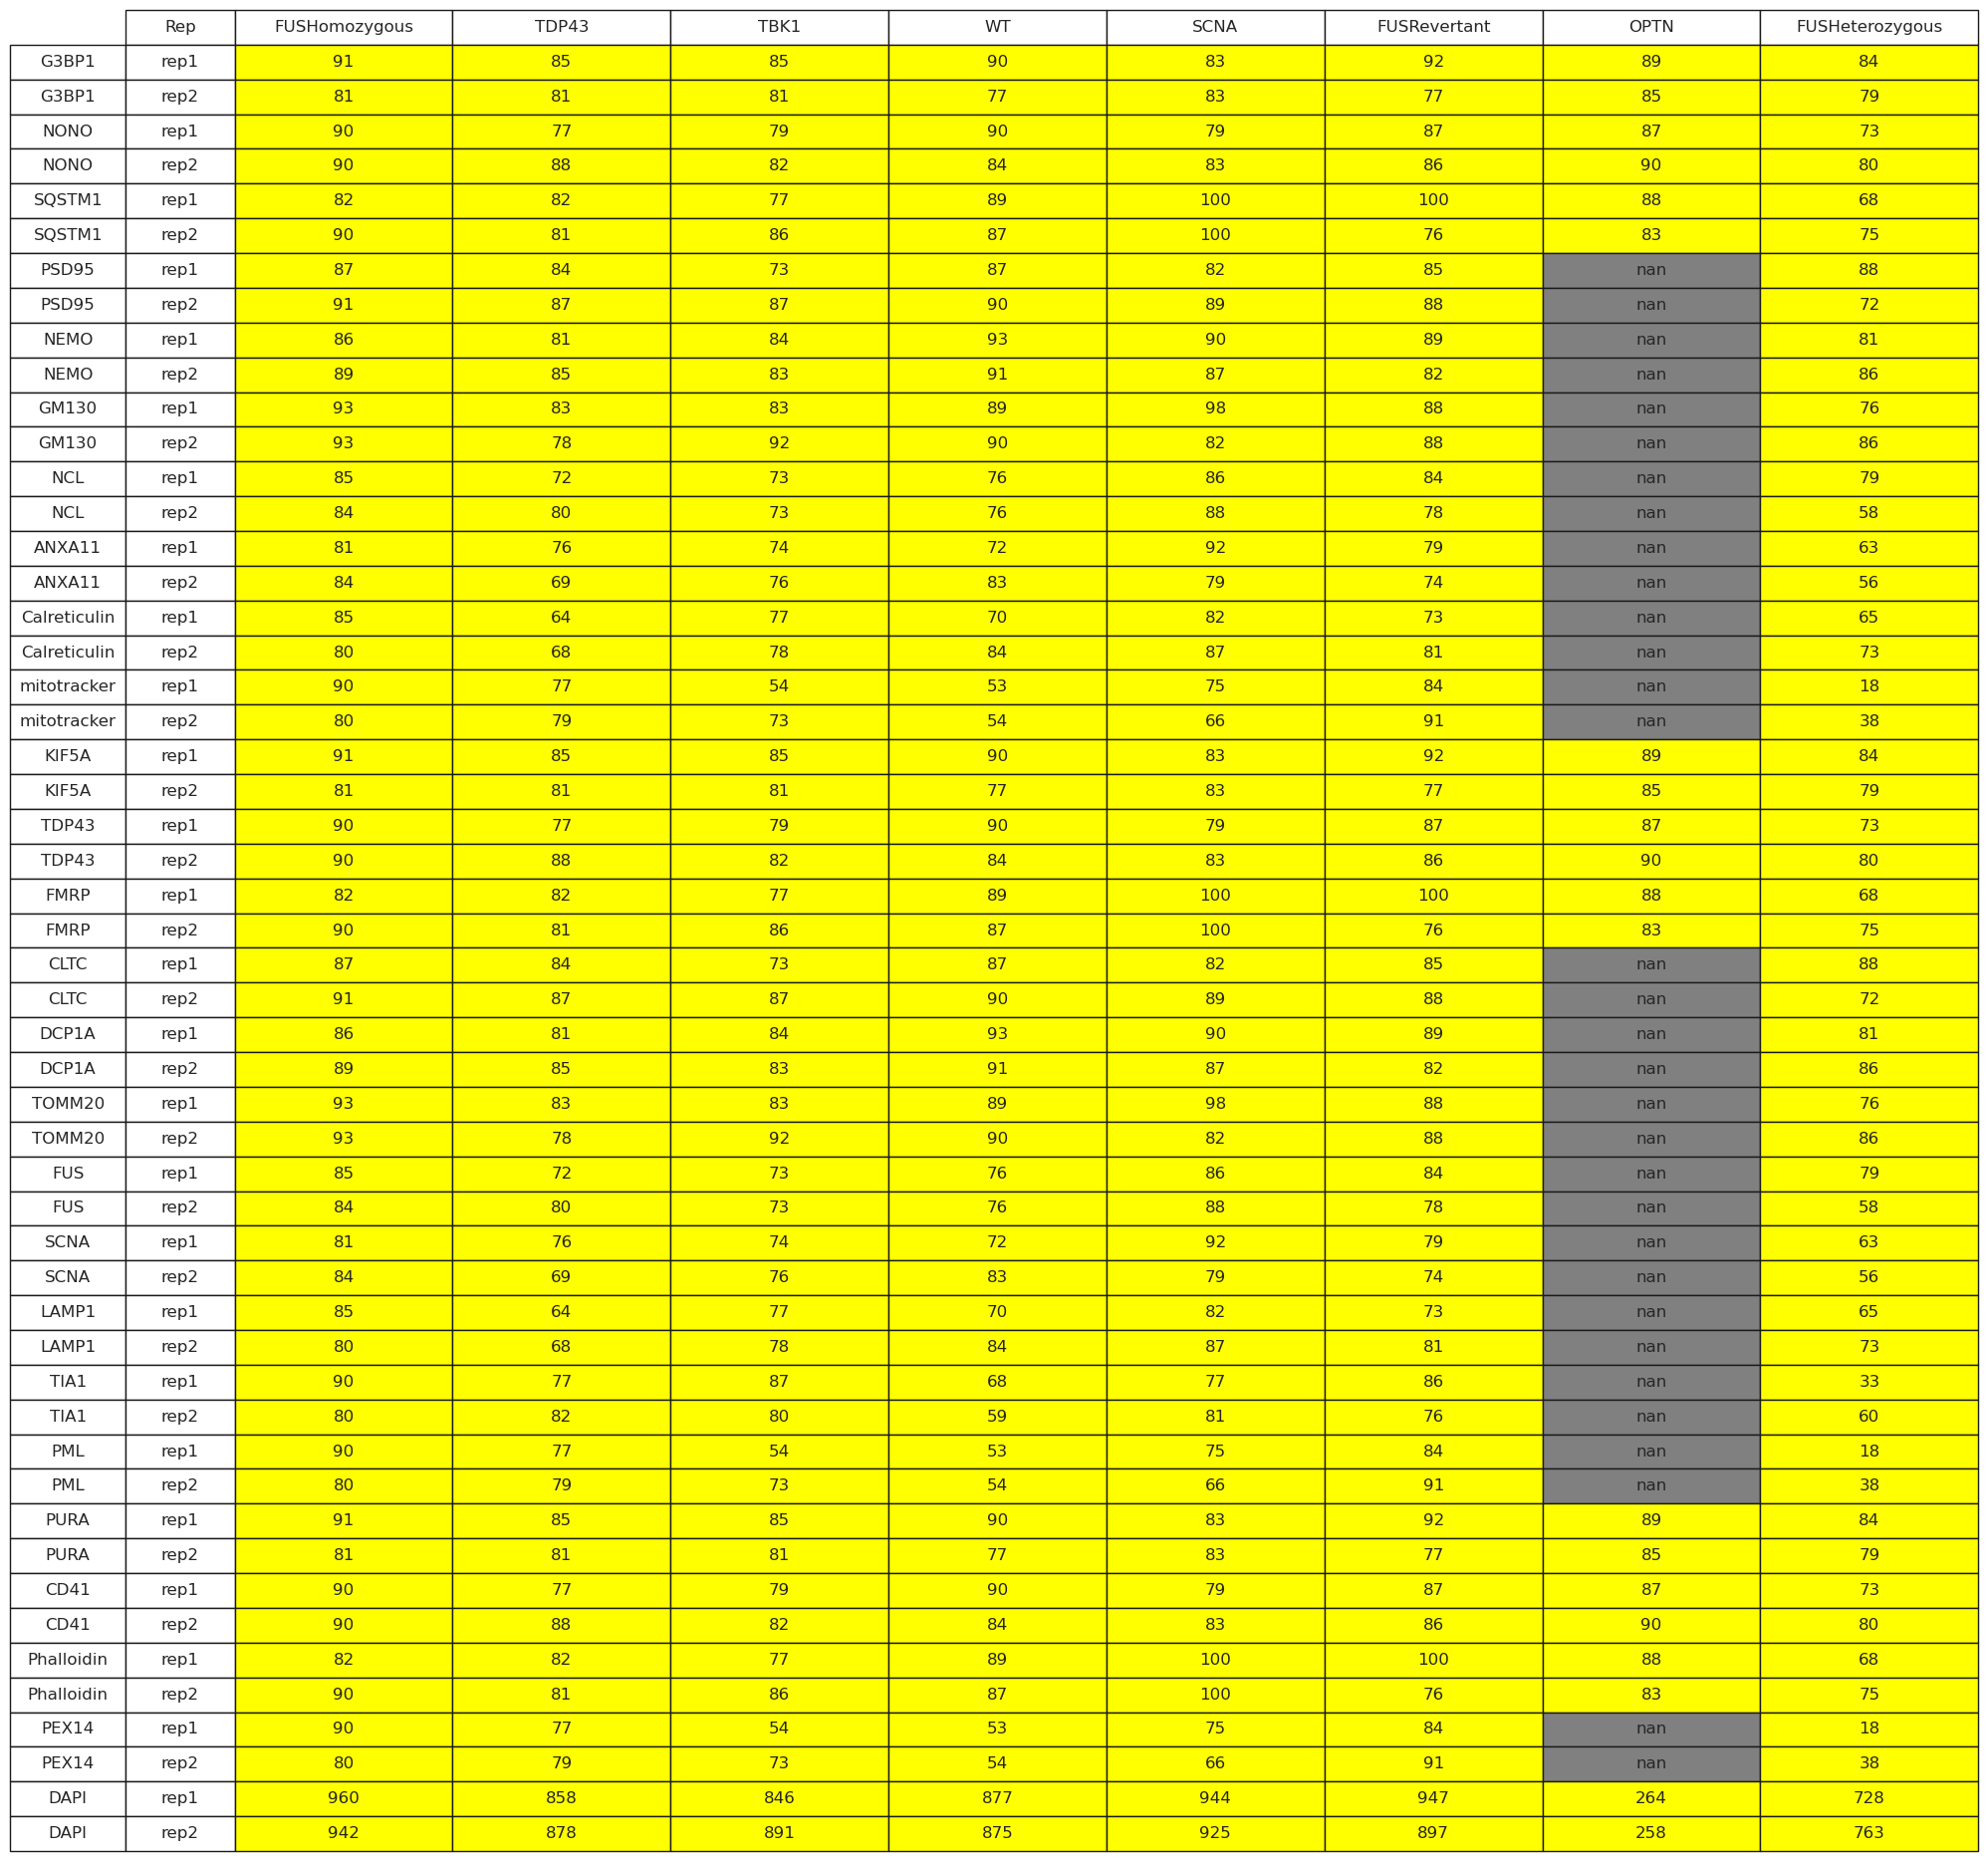

In [16]:
display_diff(batches, raws, procs, PLOT_PATH)

In [10]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']: #problem with batch9: files that are 1 bytes!!!  
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, num_markers=26,
                                      cond_count=1, rep_count=len(reps))
    print(f'{batch} var: ',var)

batch2 var:  0.010164931452749274
batch3 var:  0.009063675934677664
batch4 var:  0.009132239572094056



# <font color='red'>Number of sites in each batch and cell line </font>


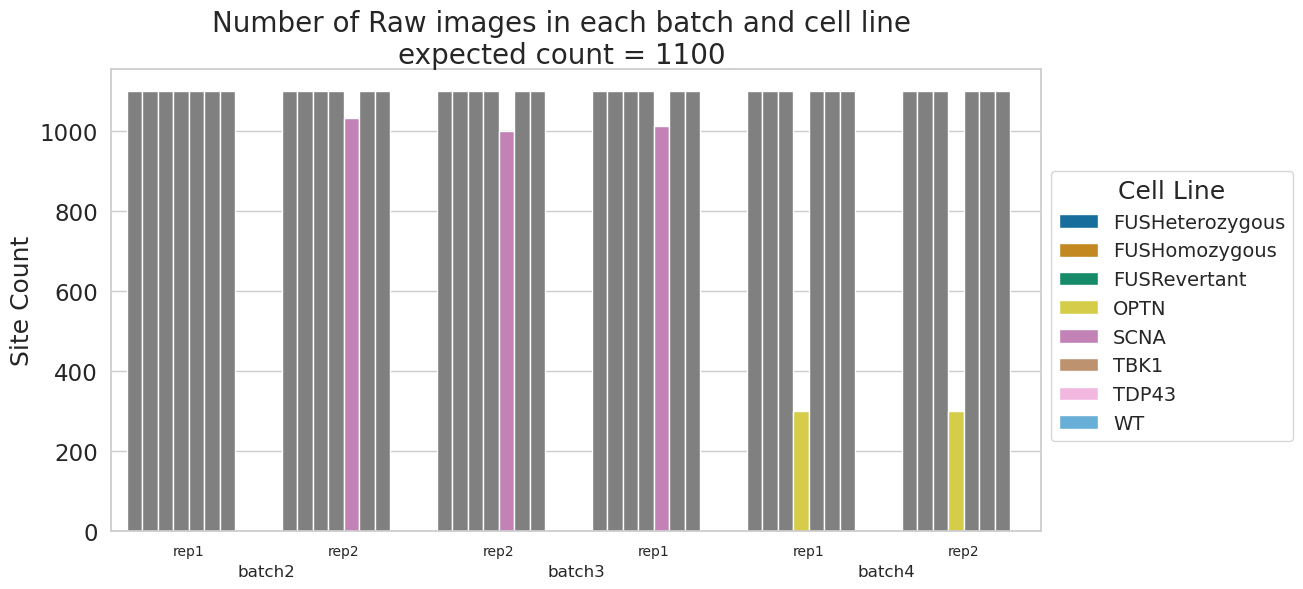

In [9]:
plot_sites_count(df, expected_raw, microglia_lines_order, microglia_custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

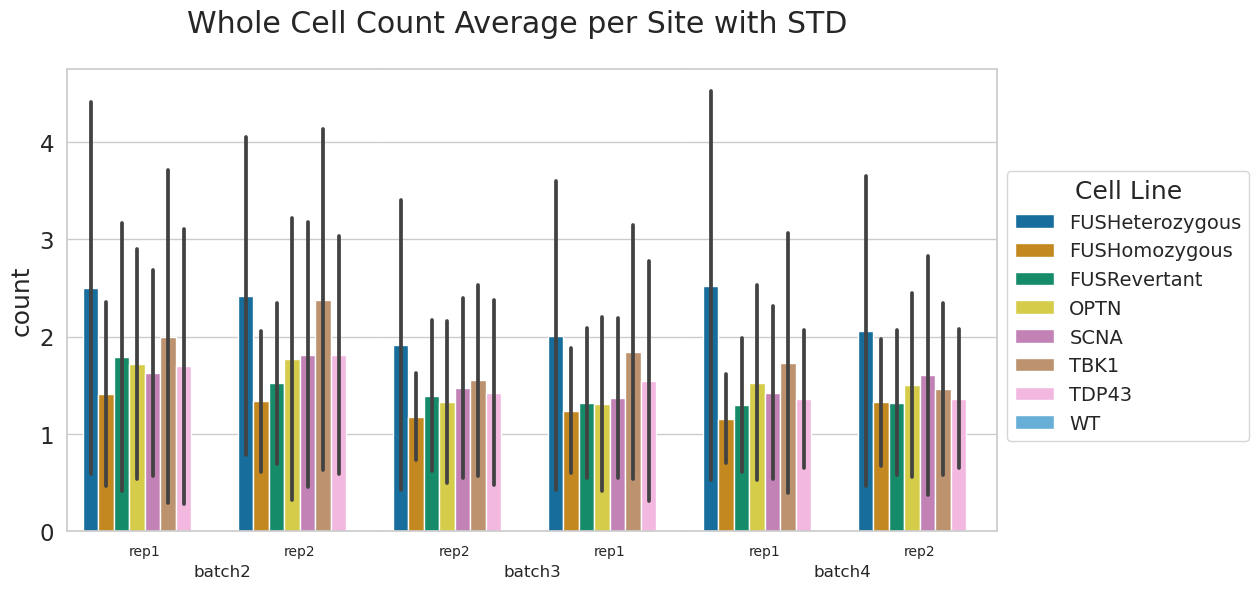

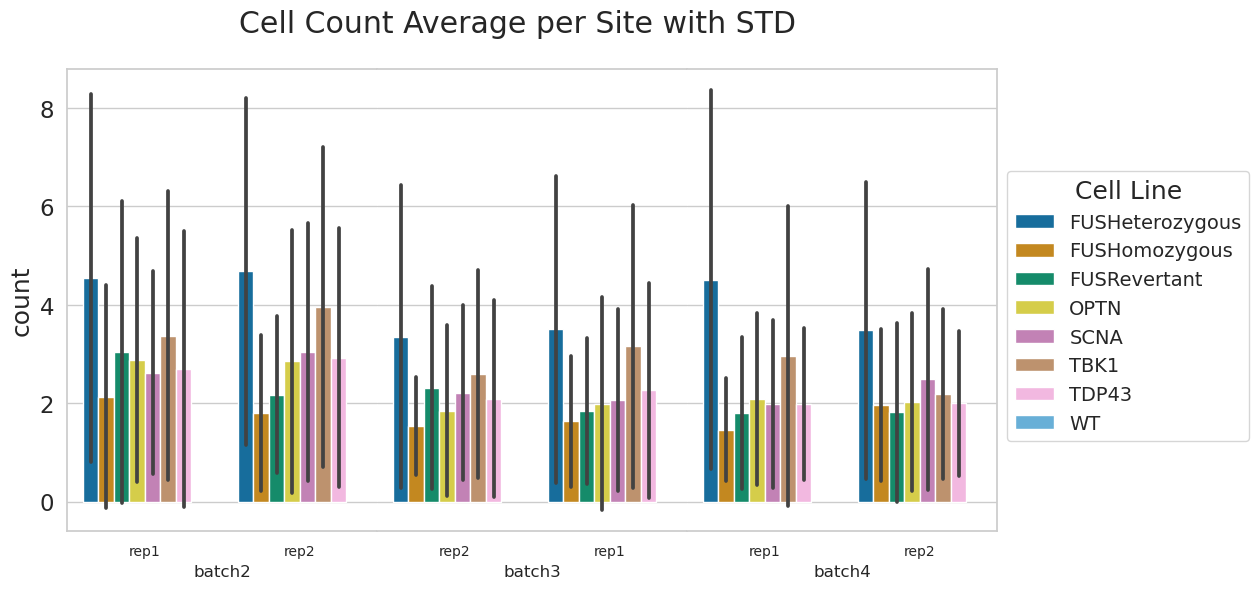

In [10]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, microglia_lines_order, microglia_custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, microglia_lines_order, microglia_custom_palette, whole_cells=False)
# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


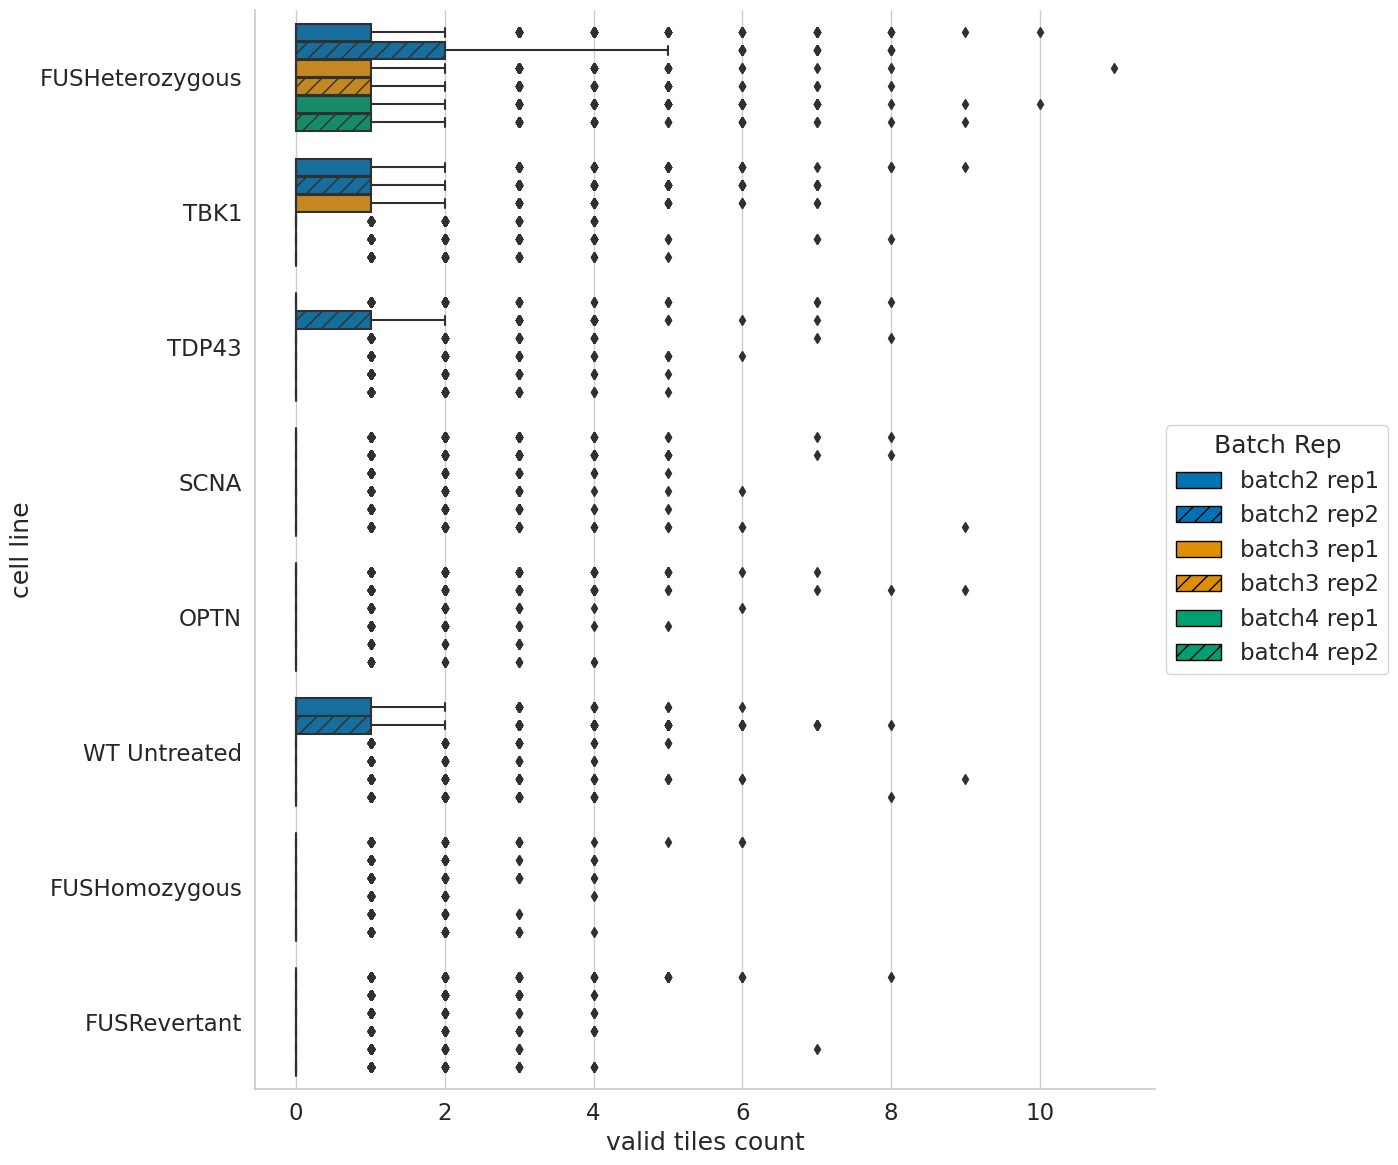

In [11]:
plot_n_valid_tiles_count(df, microglia_custom_palette,reps, batch_min=2, batch_max=4)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


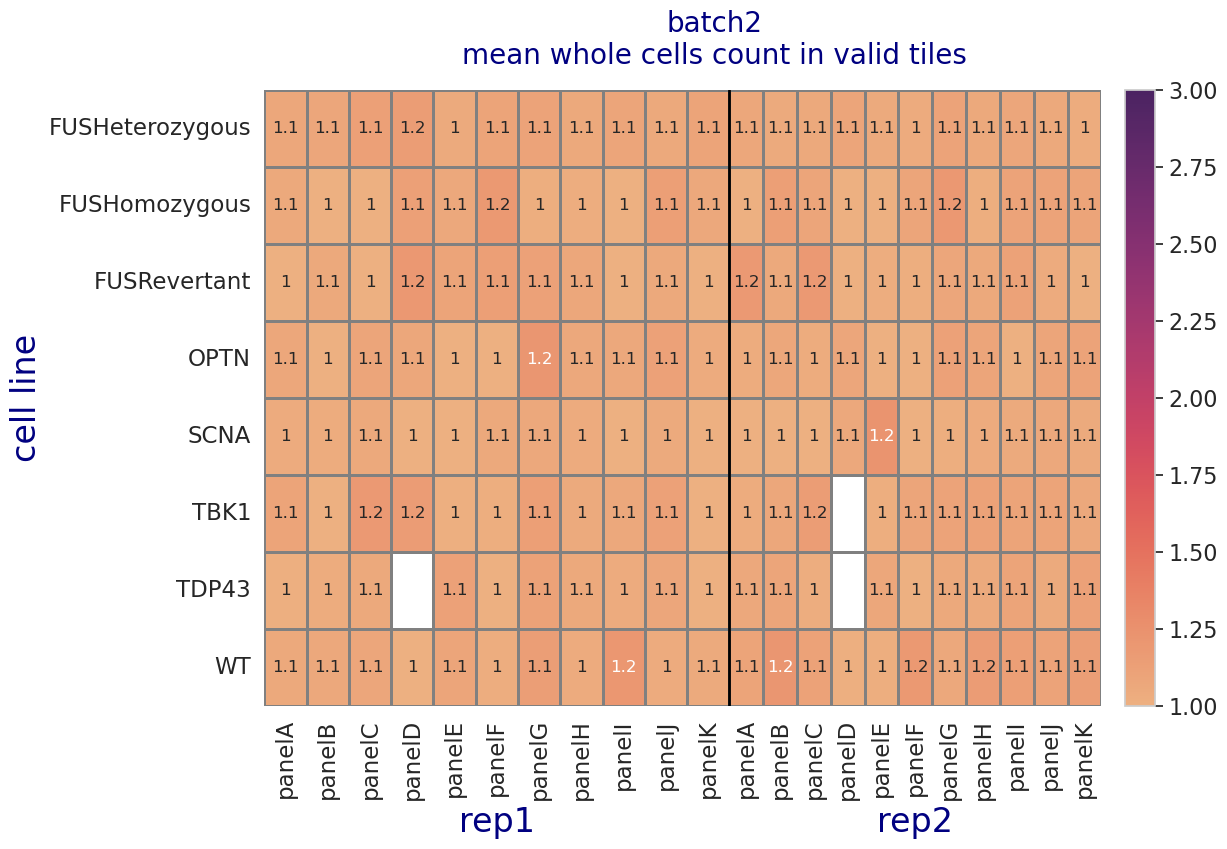

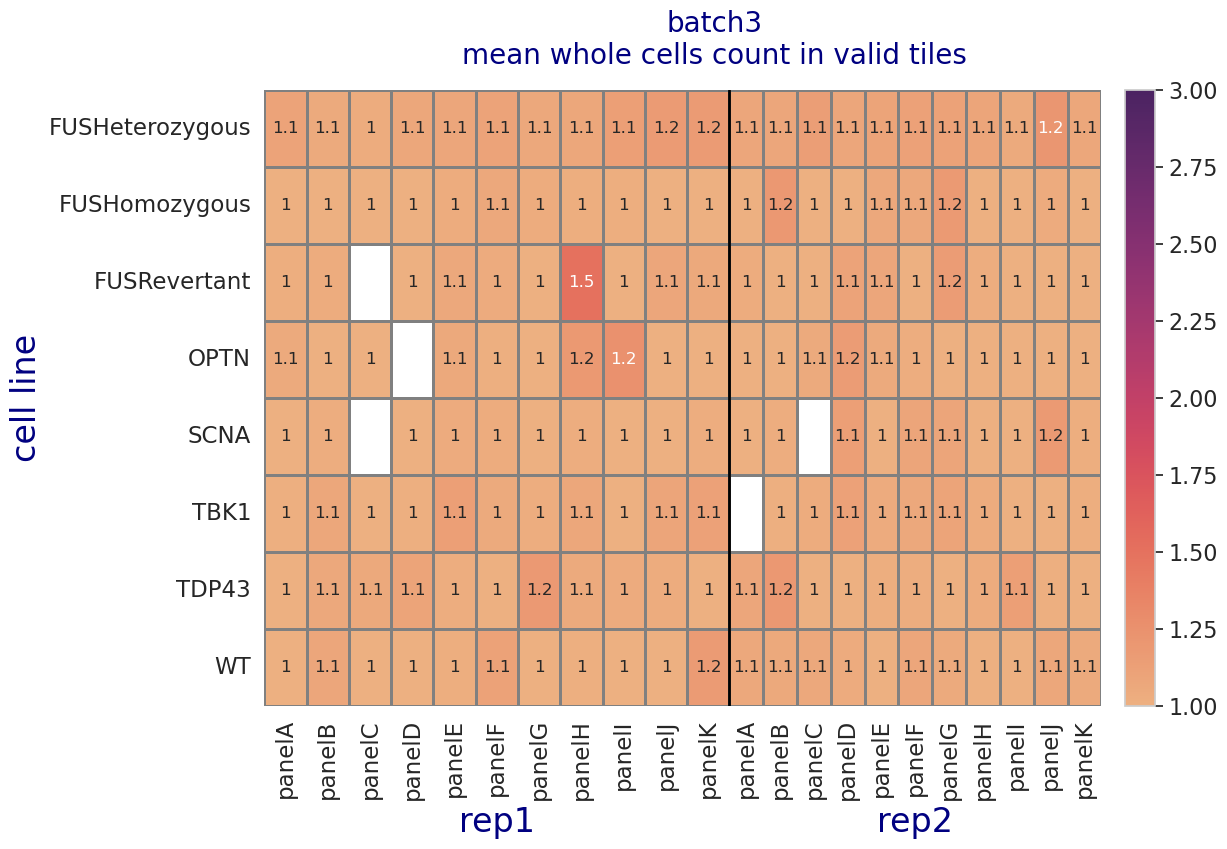

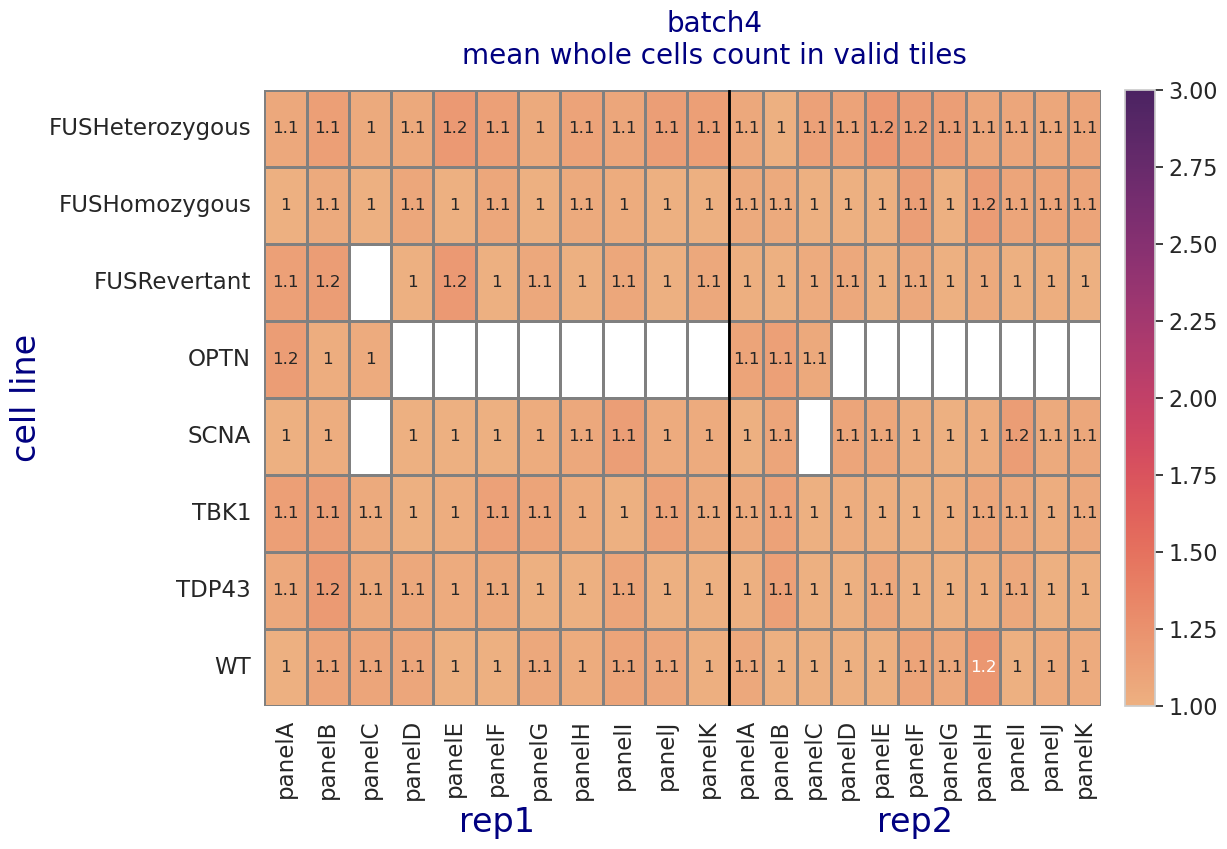

In [12]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch2


/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps/src/common/lib/images_qc.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


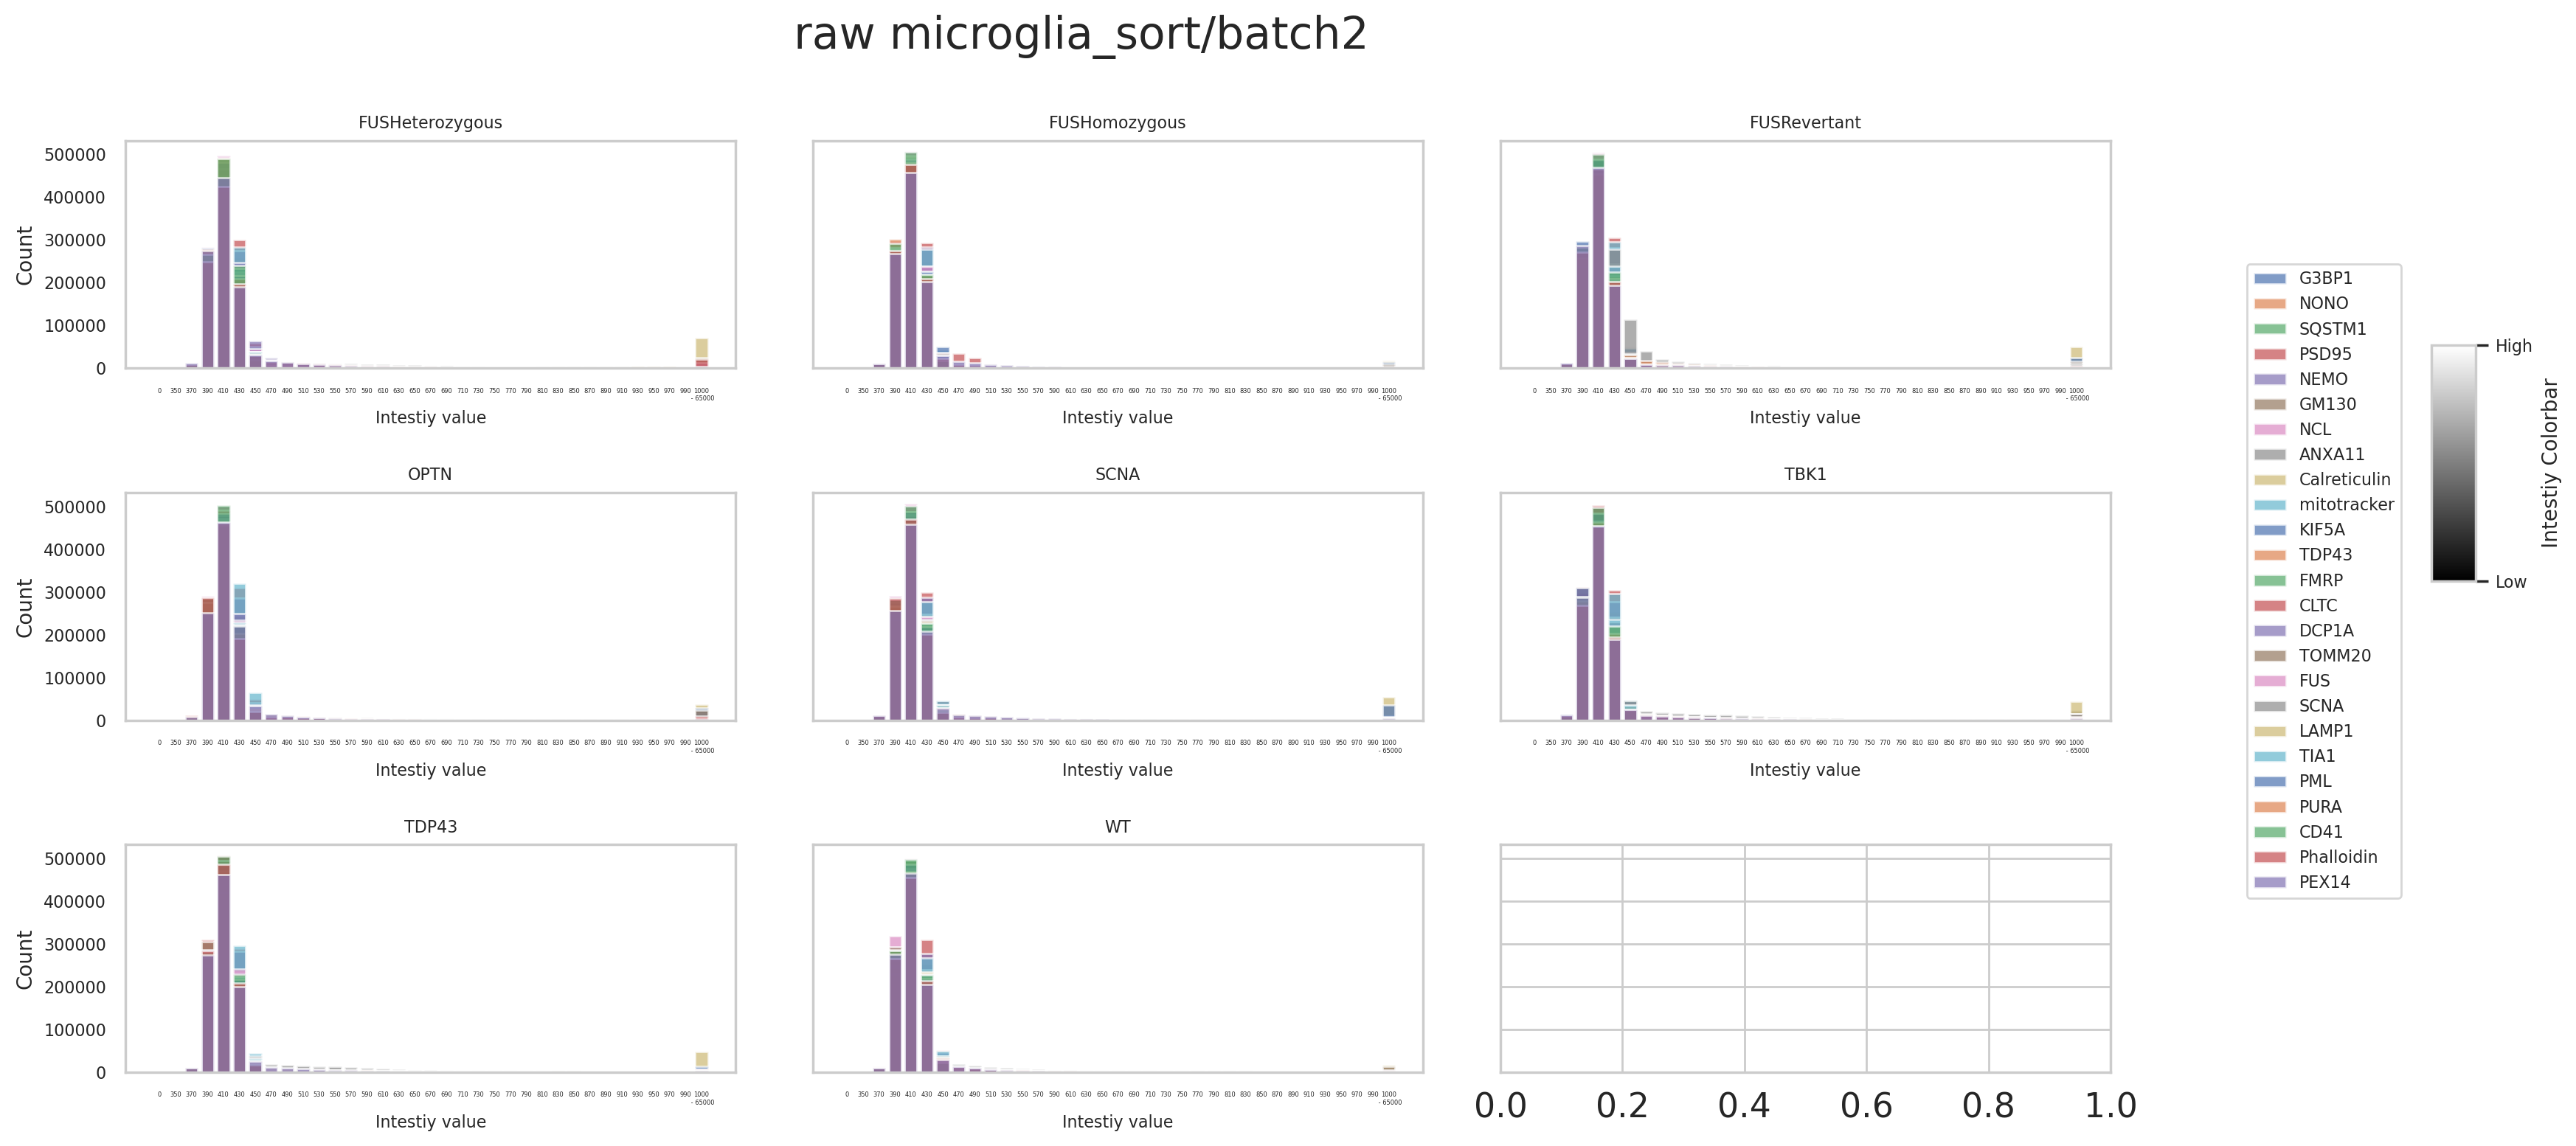

/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


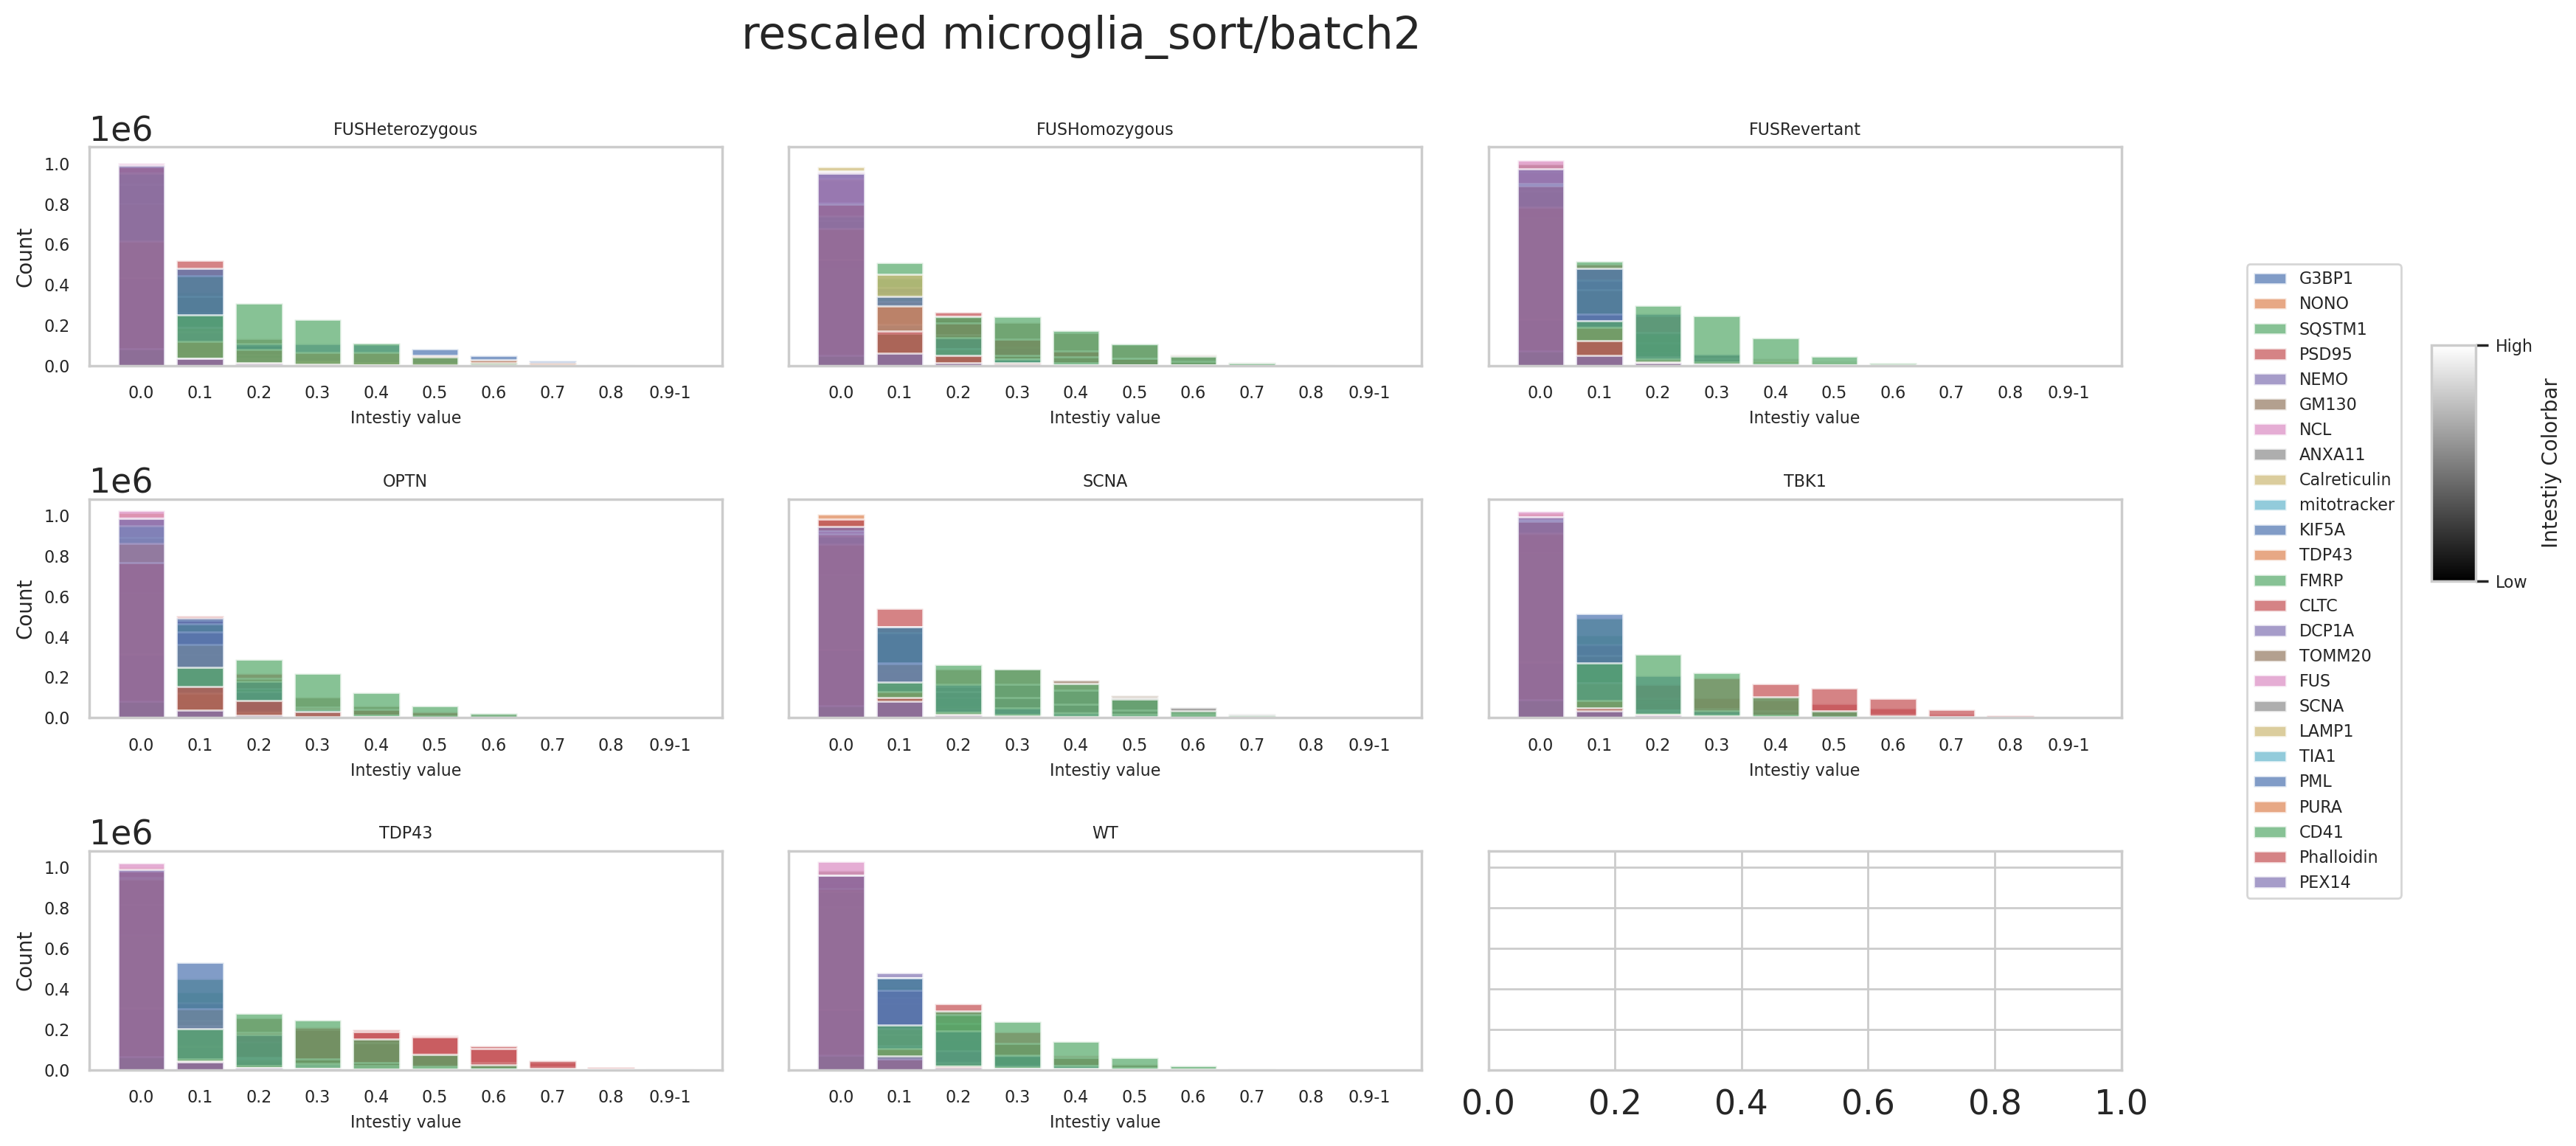

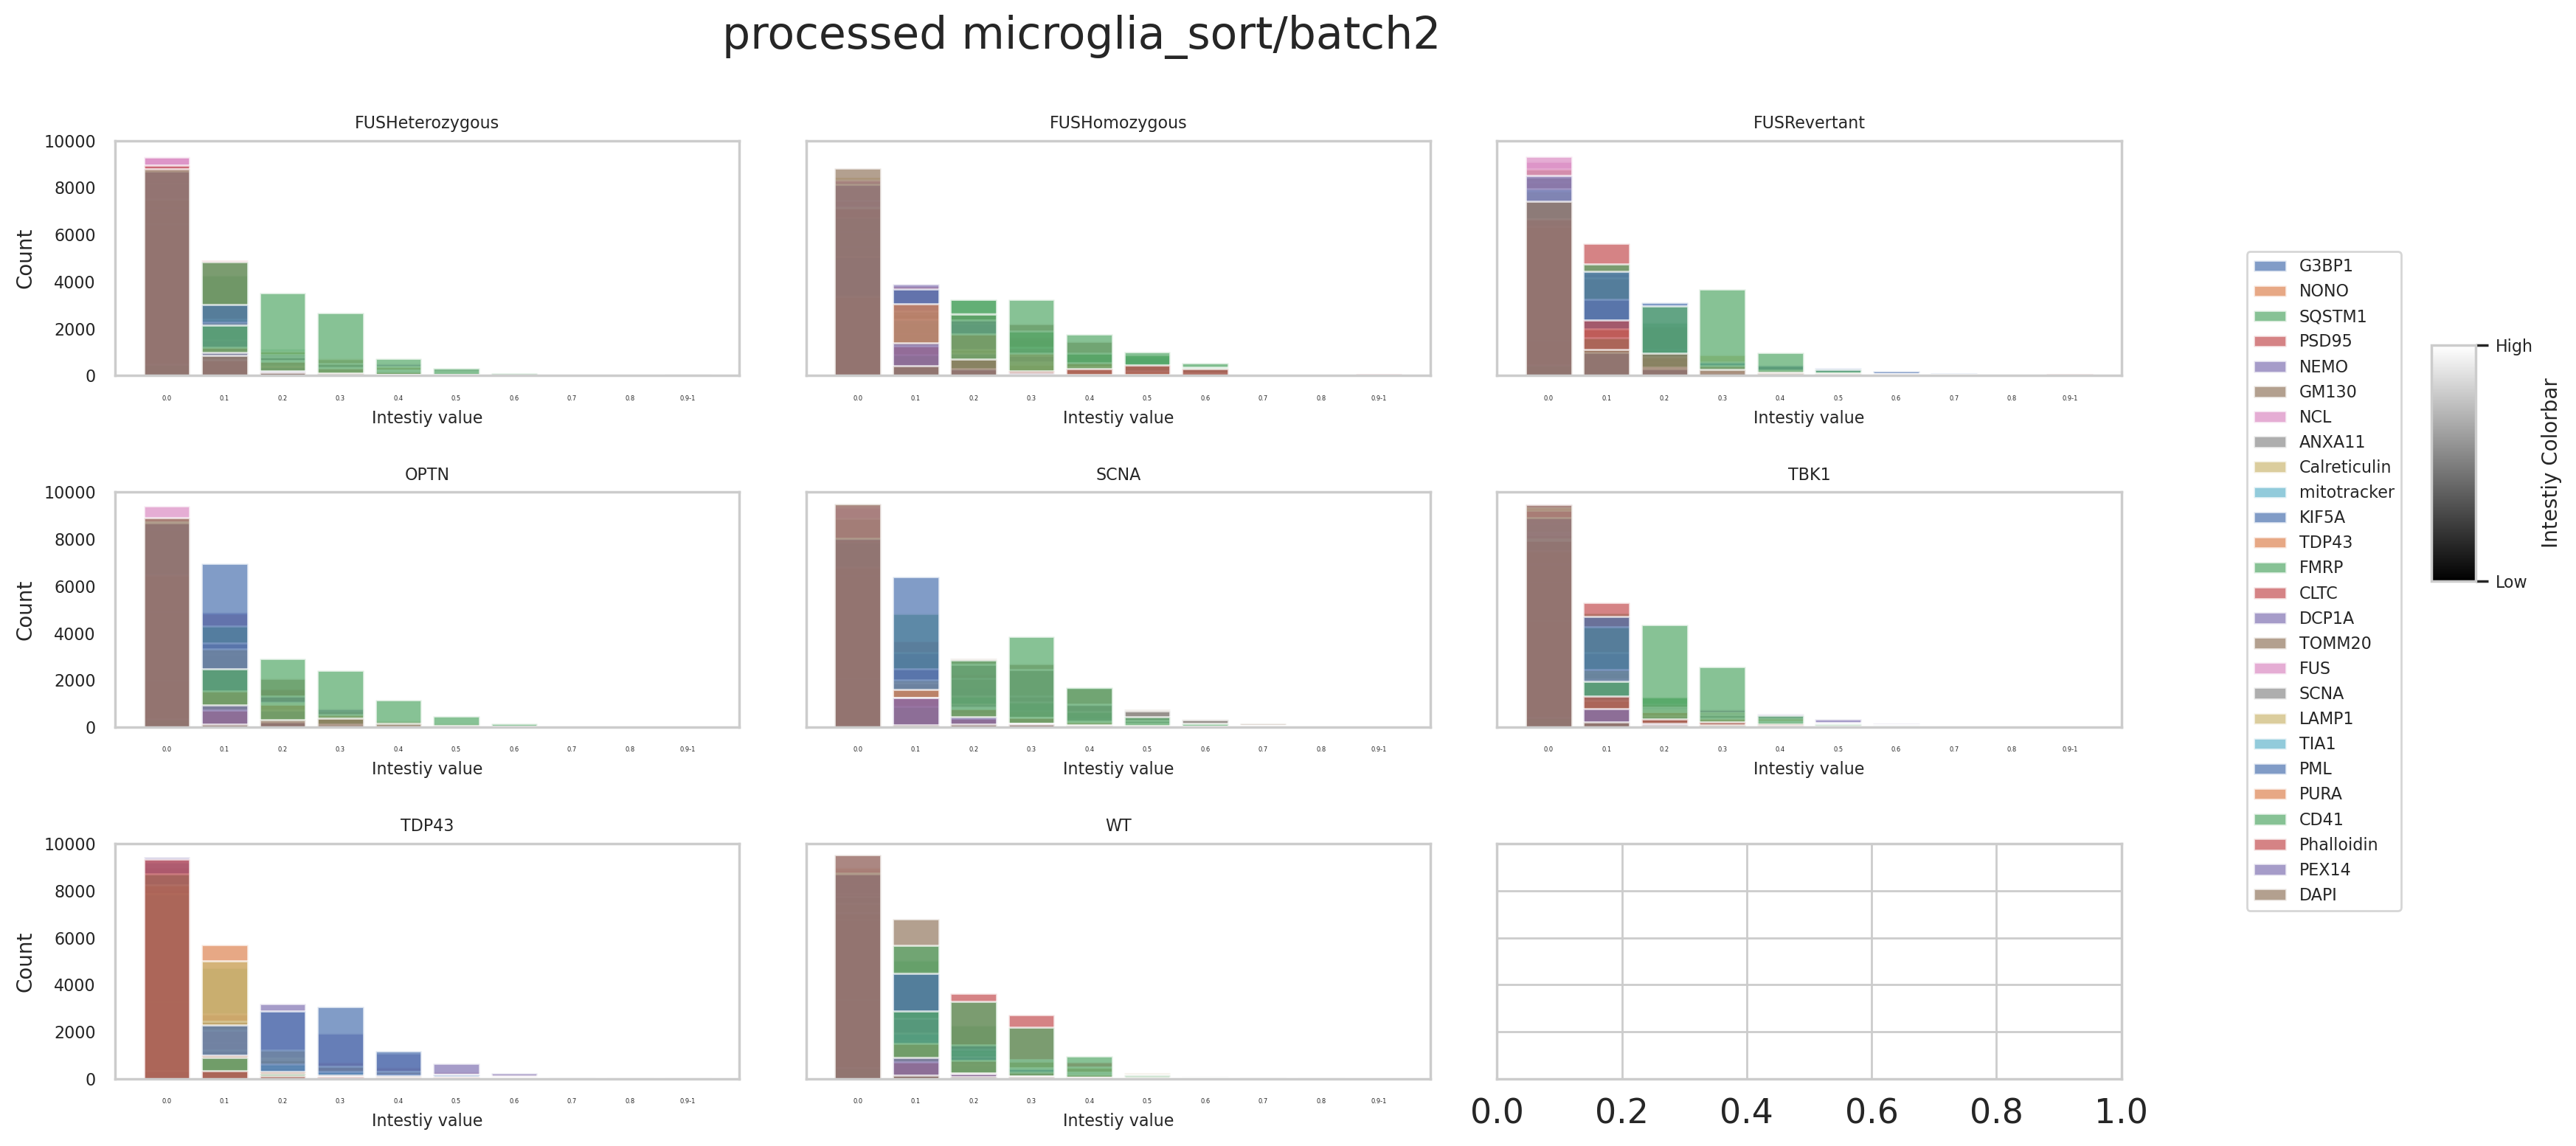

batch3


AttributeError: 'NoneType' object has no attribute 'flatten'

In [15]:
for batch in batches:
    print(batch)
    run_calc_hist_new(f'microglia_sort/{batch}',microglia_cell_lines_for_disp,
                      markers,hist_sample=10,
                               cond_count=1, rep_count=len(reps),
                             sample_size_per_markers=200)
    print("="*30)

In [ ]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_microglia.ipynb')